<a href="https://colab.research.google.com/github/A1R-3112/A1R_bootproject1/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. EDA
#### Data Description
* Name : 게임의 이름
* Platform : 게임이 지원되는 플랫폼의 이름
* Year : 게임이 출시된 연도
* Genre : 게임의 장르
* Publisher : 게임을 제작한 회사
* NA_Sales : 북미지역에서의 출고량
* EU_Sales : 유럽지역에서의 출고량
* JP_Sales : 일본지역에서의 출고량
* Other_Sales : 기타지역에서의 출고량

#### ✨알고자 하는 것
1. 지역마다 선호하는 게임의 차이유무
2. 연도별 게임의 트렌드 변화
3. 출고량이 높은 게임에 대한 `분석 및 시각화 프로세스`

In [ ]:
# 그래프 한글폰트 추가
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df = pd.read_csv(url, index_col = 0)
df.head()

Name Platform    Year      Genre  \
1                    Candace Kane's Candy Factory       DS  2008.0     Action   
2                                  The Munchables      Wii  2009.0     Action   
3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
4                Deal or No Deal: Special Edition       DS  2010.0       Misc   
5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
1           Destineer     0.04        0        0           0  
2  Namco Bandai Games     0.17        0        0        0.01  
3           Alchemist        0        0     0.02           0  
4           Zoo Games     0.04        0        0           0  
5         D3Publisher     0.12     0.09        0        0.04

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df[(df.Year.isna() == True) | (df.Genre.isna() == True) | (df.Publisher.isna() == True)]

Name Platform    Year  \
32                                             Rock Band     X360     NaN   
51                              Ape Escape: On the Loose      PSP  2005.0   
110           Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii     NaN   
273                                   UK Truck Simulator       PC  2010.0   
274          Jewel Link Chronicles: Mountains of Madness       DS     NaN   
359                   Majesty 2: The Fantasy Kingdom Sim     X360     NaN   
409                                          NBA Ballers       XB  2004.0   
431                                           Famista 64      N64     NaN   
549                                      Transworld Surf       XB     NaN   
676                                     Battle vs. Chess      PS3     NaN   
809                            Major League Baseball 2K6      PSP     NaN   
819                           Twisted Metal: Small Brawl       PS     NaN   
953                              Tiger Woods PGA Tour 07      Wii     NaN   
1012                              Tribes: Aerial Assault      PS2     NaN   
1042                       Metal Gear Solid 2: Substance       XB     NaN   
1094                                   Star Trek: Legacy     X360     NaN   
1236                            My Healthy Cooking Coach       DS     NaN   
1286                               Mega Man X Collection      PS2     NaN   
1302                                        Move Fitness      PS3     NaN   
1314      All Grown Up!: Game Boy Advance Video Volume 1      GBA  2004.0   
1329                                          NFL Street       XB  2004.0   
1510                                Flip's Twisted World      Wii     NaN   
1524                             Super Puzzle Fighter II      GBA     NaN   
1535                           Luminous Arc 2 (JP sales)       DS     NaN   
1561   Teenage Mutant Ninja Turtles: Game Boy Advance...      GBA  2004.0   
1573                                  Tomb Raider (2013)       PC     NaN   
1583                      SingStar Singalong With Disney      PS2  2008.0   
1614                                   Street Fighter IV       PC     NaN   
1790   Nicktoons Collection: Game Boy Advance Video V...      GBA  2004.0   
1797                        Agarest Senki: Re-appearance      PS3     NaN   
1880                      Monster Hunter Frontier Online      PS3     NaN   
1885                     Harvest Moon: Save the Homeland      PS2     NaN   
1904                                        NHL Hitz Pro       GC     NaN   
1962   Nicktoons Collection: Game Boy Advance Video V...      GBA  2004.0   
1972                                 Pokemon X/Pokemon Y      3DS  2013.0   
2027                                    Final Fantasy XI      PS2     NaN   
2044                                       NASCAR Racing       PS  1996.0   
2057                                  The Golden Compass      Wii     NaN   
2063                                              Shorts       DS     NaN   
2071                                      World of Tanks     X360     NaN   
2131                                      Call of Duty 3      Wii     NaN   
2143                                       Madden NFL 06     X360     NaN   
2203                     Dinotopia: The Sunstone Odyssey       GC     NaN   
2271                                        Virtua Quest      PS2     NaN   
2338                      Captain America: Super Soldier       DS     NaN   
2409          Writing and Speaking Beautiful Japanese DS       DS     NaN   
2479              Disney's Chicken Little: Ace In Action      Wii     NaN   
2493                                     Madden NFL 2002       XB     NaN   
2498                    Jurassic Park III: Island Attack      GBA  2001.0   
2528               Maze Craze: A Game of Cops 'n Robbers     2600     NaN   
2546                                          Sabre Wulf      GBA     NaN   
2553                                  The Golden

- Year의 Null Value를 각 플랫폼에 해당되는 최빈값으로 채워넣기

In [ ]:
pd.reset_option('display.max_columns', None)
pd.reset_option('display.max_rows', None)

In [ ]:
df[df.loc[:,'NA_Sales'].str.contains('K') == True].NA_Sales.value_counts()

0K       26
20K       6
50K       4
60K       4
90K       3
150K      3
130K      3
30K       3
40K       3
100K      3
1610K     2
280K      2
120K      2
290K      2
220K      2
10K       2
770K      2
1210K     2
340K      1
2010K     1
600K      1
550K      1
2570K     1
540K      1
270K      1
420K      1
720K      1
470K      1
480K      1
820K      1
2930K     1
1780K     1
80K       1
310K      1
450K      1
170K      1
350K      1
190K      1
70K       1
5170K     1
4100K     1
240K      1
490K      1
320K      1
Name: NA_Sales, dtype: int64

In [ ]:
df[df.loc[:,'NA_Sales'].str.contains('M') == True].NA_Sales.value_counts()

0M       30
0.02M     7
0.11M     4
0.13M     4
0.01M     3
0.05M     3
0.3M      2
0.08M     2
0.07M     2
0.03M     2
0.15M     2
0.1M      2
0.06M     2
0.14M     2
0.31M     2
0.72M     1
9.63M     1
0.45M     1
0.29M     1
0.37M     1
0.12M     1
0.34M     1
0.28M     1
0.26M     1
0.18M     1
7.03M     1
0.46M     1
0.96M     1
0.58M     1
1.18M     1
0.04M     1
0.22M     1
0.55M     1
0.25M     1
2.66M     1
1.11M     1
0.9M      1
1.3M      1
0.43M     1
0.21M     1
0.36M     1
0.61M     1
1.13M     1
1.23M     1
5.55M     1
0.53M     1
Name: NA_Sales, dtype: int64

1. 판매량에 관해서 K와 M이 붙은 데이터가 존재하는데 일반적으로 소수점으로 나타나는 관측값의 단위를 M 즉, 100만이라고 생각하고 K가 붙은 경우는 단위를 1000으로 생각한다.
2. 따라서, K의 경우 K 제거 후 100으로 나누고, M의 경우 M을 제거한다.

In [ ]:
# 판매량에 관한 데이터만 따로 추출하여 sales라는 변수에 저장

sales = df.loc[:,'NA_Sales':'Other_Sales']
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NA_Sales     16598 non-null  object
 1   EU_Sales     16598 non-null  object
 2   JP_Sales     16598 non-null  object
 3   Other_Sales  16598 non-null  object
dtypes: object(4)
memory usage: 648.4+ KB


In [ ]:
#1. 판매량에 존재하는 K를 포함하는 데이터만 추출

def replace_K(col):
  col[col.str.contains('K')] = col[col.str.contains('K')].str.replace('K', '').astype(int)/1000

replace_K(sales.NA_Sales)
replace_K(sales.EU_Sales)
replace_K(sales.JP_Sales)
replace_K(sales.Other_Sales)

In [ ]:
def replace_M(col):
  col[col.str.contains('M', na = False)] = col[col.str.contains('M', na = False)].str.replace('M', '')

replace_M(sales.NA_Sales)
replace_M(sales.EU_Sales)
replace_M(sales.JP_Sales)
replace_M(sales.Other_Sales)

In [ ]:
sales = sales.astype(float)

In [ ]:
df.iloc[:,5:9] = sales
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.8+ MB


- 판매량에 K와 M을 제거후 단위를 같게 만듬(: 백만개)
- Null Value 처리
 - 제거? 대체?

In [ ]:
df_20 = df.query('Year <= 1900 & Year > = 40') # 20세기에 출시된 게임들
df_21_1 = df.query('Year >= 10 & Year < 40') # 21세기 (2009년 이후) 출시된 게임들
df_21_2 = df.query('Year < 10') # 21세기 초에 출시된 게임들

In [ ]:
# 20세기에 발매된 년도를 19XX년으로 변환시켜서 저장

df_20.loc[:,'Year'] = df_20.loc[:,'Year'].astype(str)
df_20.loc[:,'Year'] = '19' + df_20.loc[:,'Year']
df_20.loc[:,'Year'] = df_20.Year.astype(float)
df_20.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 82 to 16483
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         14 non-null     object 
 1   Platform     14 non-null     object 
 2   Year         14 non-null     float64
 3   Genre        14 non-null     object 
 4   Publisher    14 non-null     object 
 5   NA_Sales     14 non-null     float64
 6   EU_Sales     14 non-null     float64
 7   JP_Sales     14 non-null     float64
 8   Other_Sales  14 non-null     float64
dtypes: float64(5), object(4)
memory usage: 1.1+ KB


In [ ]:
# 21세기에 발매된 년도를 20XX년으로 변환시켜서 저장

df_21_1.loc[:,'Year'] = df_21_1.loc[:,'Year'].astype(str)
df_21_1.loc[:,'Year'] = '20' + df_21_1.loc[:,'Year']
df_21_1.loc[:,'Year'] = df_21_1.Year.astype(float)


df_21_2.loc[:,'Year'] = df_21_2.loc[:,'Year'].astype(str)
df_21_2.loc[:,'Year'] = '200' + df_21_2.loc[:,'Year']
df_21_2.loc[:,'Year'] = df_21_2.Year.astype(float)


In [ ]:
df.loc[df_20.index,'Year'] = df_20.Year
df.loc[df_21_1.index,'Year'] = df_21_1.Year
df.loc[df_21_2.index,'Year'] = df_21_2.Year

1. 장르에 관한 부분은 결측값을 제거하는 쪽으로 한다.
2. 발매회사의 경우 결측값을 Unknown으로 대체한다.

In [ ]:
df.drop(df[df.Genre.isna() == True].index, axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df

Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16543                         Ice Age 2: The Meltdown       GC  2006.0   
16544                     Rainbow Islands: Revolution      PSP  2005.0   
16545                                        NBA 2K16      PS3  2015.0   
16546                     Toukiden: The Age of Demons      PSV  2013.0   
16547                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action                    Destineer      0.04      0.00      0.00   
1         Action           Namco Bandai Games      0.17      0.00      0.00   
2      Adventure                    Alchemist      0.00      0.00      0.02   
3           Misc                    Zoo Games      0.04      0.00      0.00   
4       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16543   Platform                Vivendi Games      0.15      0.04      0.00   
16544     Action            Rising Star Games      0.01      0.00      0.00   
16545     Sports         Take-Two Interactive      0.44      0.19      0.03   
16546     Action                   Tecmo Koei      0.05      0.05      0.25   
16547   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  
0             0.00  
1             0.01  
2             0.00  
3             0.00  
4             0.04  
...            ...  
16543         0.01  
16544         0.00  
16545         0.13  
16546         0.03  
16547         0.01  

[16548 rows x 9 columns]

In [ ]:
df.Publisher.fillna('Unknown', inplace = True)

3. Year(발매연도)에 대한 값은 지원플랫폼의 최빈값으로 대체한다

In [ ]:
sum_sales = df.iloc[:,5:9].apply(sum, 1)
df['Sales_sum'] = sum_sales;

In [ ]:
Y_na = df[df.Year.isna() == True]
Y_na.head()

Name Platform  Year       Genre  \
31                                     Rock Band     X360   NaN        Misc   
108   Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   NaN      Racing   
272  Jewel Link Chronicles: Mountains of Madness       DS   NaN      Puzzle   
357           Majesty 2: The Fantasy Kingdom Sim     X360   NaN  Simulation   
428                                   Famista 64      N64   NaN      Sports   

              Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum  
31      Electronic Arts      1.93      0.34      0.00         0.21       2.48  
108             Unknown      0.00      0.00      0.02         0.00       0.02  
272           Avanquest      0.00      0.06      0.00         0.01       0.07  
357             Unknown      0.03      0.00      0.00         0.00       0.03  
428  Namco Bandai Games      0.00      0.00      0.17         0.03       0.20

In [ ]:
# 총 판매수가 100만을 넘는 게임들은 직접 연도를 삽입 나머지 게임들은 플랫폼별 최빈값으로 대체
Y_na_upper = Y_na.query("Sales_sum >= 1")
Y_na_upper

Name Platform  Year      Genre  \
31                                       Rock Band     X360   NaN       Misc   
2124                                Call of Duty 3      Wii   NaN    Shooter   
3024                          Donkey Kong Land III       GB   NaN   Platform   
3340                    LEGO Batman: The Videogame      Wii   NaN     Action   
3551                    wwe Smackdown vs. Raw 2006      PS2   NaN   Fighting   
3930                   Legacy of Kain: Soul Reaver       PS   NaN     Action   
4168                                     Rock Band      Wii   NaN       Misc   
5656                     Hitman 2: Silent Assassin       XB   NaN     Action   
5701                                     Adventure     2600   NaN  Adventure   
6928                               Madden NFL 2004      PS2   NaN     Sports   
8504   LEGO Indiana Jones: The Original Adventures      Wii   NaN     Action   
9215                  LEGO Harry Potter: Years 5-7      Wii   NaN     Action   
9932                    LEGO Batman: The Videogame      PSP   NaN     Action   
10748                                    Rock Band      PS3   NaN       Misc   
10936                             FIFA Soccer 2004      PS2   NaN     Sports   
11277                               Triple Play 99       PS   NaN     Sports   
12820                                    Rock Band      PS2   NaN       Misc   
12946                      Call of Duty: Black Ops       PC   NaN    Shooter   
13287     Frogger's Adventures: Temple of the Frog      GBA   NaN  Adventure   
13711                          NASCAR Thunder 2003      PS2   NaN     Racing   
14724                                       Combat     2600   NaN     Action   
16228                               Space Invaders     2600   NaN    Shooter   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
31                            Electronic Arts      1.93      0.34      0.00   
2124                               Activision      1.19      0.84      0.00   
3024                                 Nintendo      0.68      0.31      0.00   
3340   Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
3551                                  Unknown      1.57      1.02      0.00   
3930                        Eidos Interactive      0.58      0.40      0.00   
4168                                MTV Games      1.35      0.56      0.00   
5656                        Eidos Interactive      0.76      0.38      0.00   
5701                                    Atari      1.21      0.08      0.00   
6928                          Electronic Arts      4.26      0.26      0.01   
8504                                LucasArts      1.54      0.63      0.00   
9215   Warner Bros. Interactive Entertainment      0.76      0.47      0.00   
9932   Warner Bros. Interactive Entertainment      0.57      0.46      0.00   
10748                         Electronic Arts      0.99      0.41      0.00   
10936                         Electronic Arts      0.59      2.36      0.04   
11277                                 Unknown      0.81      0.55      0.00   
12820                         Electronic Arts      0.71      0.06      0.00   
12946                              Activision      0.58      0.81      0.00   
13287            Konami Digital Entertainment      2.15      0.18      0.00   
13711                                 Unknown      0.60      0.46      0.00   
14724                                   Atari      1.17      0.07      0.00   
16228                                   Atari      2.36      0.14      0.00   

       Other_Sales  Sales_sum  
31            0.21       2.48  
2124          0.23       2.26  
3024          0.04       1.03  
3340          0.29       3.17  
3551          0.41       3.00  
3930          0.07       1.05  
4168          0.20       2.11  
5656          0.05       1.19  
5701          0.01       1.30  
6928          0.71       5.24  
8504          0.22       2.39  
921

In [ ]:
year_series = pd.Series([2007, 2006, 1997, 2008, 2006, 1999, 2015, 2003, 2013, 2004, 2008, 2011, 2008, 2007, 2004, 1998, 2006, 2010, 2001, 2003, 1977, 1985])
for i in range(Y_na_upper.shape[0]):
  Y_na_upper.iloc[i,2] = year_series[i]

In [ ]:
Y_na_upper.head()

Name Platform    Year     Genre  \
31                     Rock Band     X360  2007.0      Misc   
2124              Call of Duty 3      Wii  2006.0   Shooter   
3024        Donkey Kong Land III       GB  1997.0  Platform   
3340  LEGO Batman: The Videogame      Wii  2008.0    Action   
3551  wwe Smackdown vs. Raw 2006      PS2  2006.0  Fighting   

                                   Publisher  NA_Sales  EU_Sales  JP_Sales  \
31                           Electronic Arts      1.93      0.34       0.0   
2124                              Activision      1.19      0.84       0.0   
3024                                Nintendo      0.68      0.31       0.0   
3340  Warner Bros. Interactive Entertainment      1.86      1.02       0.0   
3551                                 Unknown      1.57      1.02       0.0   

      Other_Sales  Sales_sum  
31           0.21       2.48  
2124         0.23       2.26  
3024         0.04       1.03  
3340         0.29       3.17  
3551         0.41       3.00

In [ ]:
Y_na.loc[Y_na_upper.index, 'Year'] = Y_na_upper.Year

In [ ]:
Y_na.head()
Platform_id = Y_na.Platform.value_counts().index
Platform_id = pd.Series(Platform_id)
Platform_id

0      Wii
1      PS2
2     X360
3       DS
4      PS3
5       XB
6       PC
7     2600
8      PSP
9       GC
10     GBA
11     3DS
12      PS
13     N64
14      GB
15     PSV
dtype: object

In [ ]:
for i in range(len(Platform_id)):
  mode = df[df.Platform == Platform_id[i]].loc[:,'Year'].mode()[0]
  series = Y_na[Y_na.Platform ==  Platform_id[i]].Year.fillna(mode)
  Y_na.loc[series.index, 'Year'] = series

Y_na

Name Platform    Year  \
31                                       Rock Band     X360  2007.0   
108     Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii  2009.0   
272    Jewel Link Chronicles: Mountains of Madness       DS  2008.0   
357             Majesty 2: The Fantasy Kingdom Sim     X360  2011.0   
428                                     Famista 64      N64  1999.0   
...                                            ...      ...     ...   
16193                                Freaky Flyers       GC  2002.0   
16228                               Space Invaders     2600  1985.0   
16231                                Madden NFL 11      Wii  2009.0   
16378                               Yoostar on MTV     X360  2011.0   
16384                                  Bejeweled 3     X360  2011.0   

            Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
31           Misc     Electronic Arts      1.93      0.34      0.00   
108        Racing             Unknown      0.00      0.00      0.02   
272        Puzzle           Avanquest      0.00      0.06      0.00   
357    Simulation             Unknown      0.03      0.00      0.00   
428        Sports  Namco Bandai Games      0.00      0.00      0.17   
...           ...                 ...       ...       ...       ...   
16193      Racing             Unknown      0.01      0.00      0.00   
16228     Shooter               Atari      2.36      0.14      0.00   
16231      Sports             Unknown      0.70      0.00      0.00   
16378        Misc             Unknown      0.06      0.00      0.00   
16384      Puzzle             Unknown      0.13      0.00      0.00   

       Other_Sales  Sales_sum  
31            0.21       2.48  
108           0.00       0.02  
272           0.01       0.07  
357           0.00       0.03  
428           0.03       0.20  
...            ...        ...  
16193         0.00       0.01  
16228         0.03       2.53  
16231         0.05       0.75  
16378         0.00       0.06  
16384         0.01       0.14  

[271 rows x 10 columns]

In [ ]:
Y_na.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Sales_sum      0
dtype: int64

In [ ]:
df.loc[Y_na.index,'Year'] = Y_na.Year
df.Year = df.Year.astype(int)
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Sales_sum      0
dtype: int64

In [ ]:
df.to_csv('vgames2_edited.csv', index = False)

## 분석 시작

In [ ]:
df_clean = pd.read_csv('vgames2_edited.csv')
df_clean

Name Platform  Year  \
0                        Candace Kane's Candy Factory       DS  2008   
1                                      The Munchables      Wii  2009   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3                    Deal or No Deal: Special Edition       DS  2010   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16543                         Ice Age 2: The Meltdown       GC  2006   
16544                     Rainbow Islands: Revolution      PSP  2005   
16545                                        NBA 2K16      PS3  2015   
16546                     Toukiden: The Age of Demons      PSV  2013   
16547                        The King of Fighters '95       PS  1996   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action                    Destineer      0.04      0.00      0.00   
1         Action           Namco Bandai Games      0.17      0.00      0.00   
2      Adventure                    Alchemist      0.00      0.00      0.02   
3           Misc                    Zoo Games      0.04      0.00      0.00   
4       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16543   Platform                Vivendi Games      0.15      0.04      0.00   
16544     Action            Rising Star Games      0.01      0.00      0.00   
16545     Sports         Take-Two Interactive      0.44      0.19      0.03   
16546     Action                   Tecmo Koei      0.05      0.05      0.25   
16547   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  Sales_sum  
0             0.00       0.04  
1             0.01       0.18  
2             0.00       0.02  
3             0.00       0.04  
4             0.04       0.25  
...            ...        ...  
16543         0.01       0.20  
16544         0.00       0.01  
16545         0.13       0.79  
16546         0.03       0.38  
16547         0.01       0.17  

[16548 rows x 10 columns]

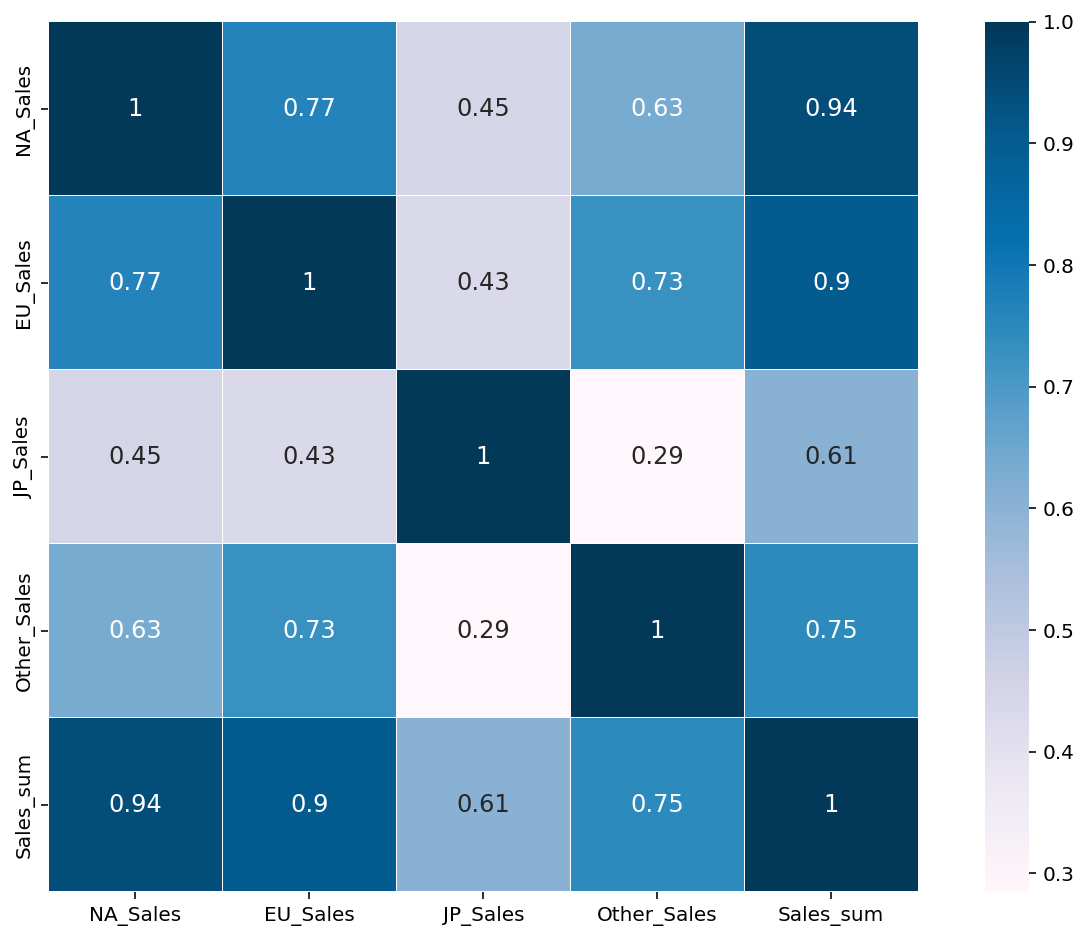

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize = [12,8])
sns.heatmap(df_clean.iloc[:,5:10].astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 12})
plt.show()

- 총 판매량인 Sales_sum을 제외한 나머지 지역별 판매량의 상관성이 0.8도 되지 않기 때문에 지역별간의 판매량에는 상관성이 적다.

- 다만, 총 출고량이 다른지역에 비해 높은 북미와 유럽은 총 판매량에 상관성을 제공하고있다.

### Q1. 장르에 따른 지역별(NA, EU, JP) 판매량의 평균을 비교해본다.(ANOVA 사용) </h> 
<br> 

- $H_0$: 지역에 따라 게임 장르에 대한 `판매량에 차이가 없다`.
- $H_1$: 지역에 따라 게임 장르에 대한 `판매량에 차이가 있다`.

<h4> 시각화 -> Barplot사용 </h>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

genre = df_clean.loc[:,'Genre':'Sales_sum'].drop('Publisher', axis = 1)
print(genre.shape)
genre.head()

(16548, 6)


Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum
0     Action      0.04      0.00      0.00         0.00       0.04
1     Action      0.17      0.00      0.00         0.01       0.18
2  Adventure      0.00      0.00      0.02         0.00       0.02
3       Misc      0.04      0.00      0.00         0.00       0.04
4   Platform      0.12      0.09      0.00         0.04       0.25

(0.0, 30.0)

<Figure size 720x504 with 0 Axes>

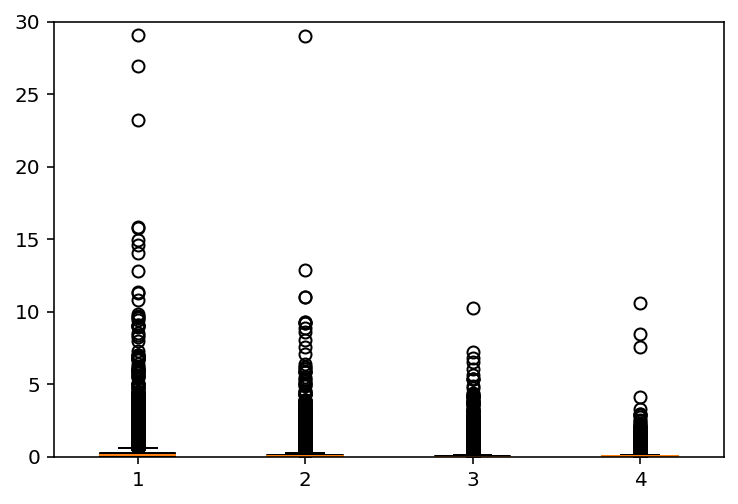

In [ ]:
plt.figure(figsize = [10,7])
fig,ax = plt.subplots()

ax.boxplot([genre.NA_Sales, genre.EU_Sales, genre.JP_Sales, genre.Other_Sales])
ax.set_ylim(0,30)

- 판매량이 10이상인 데이터들은 이상치라고 간주하고 제외시키도록한다.

In [ ]:
genre = genre.drop(genre.query('NA_Sales >= 10 | EU_Sales >= 10 | JP_Sales >= 10 | Other_Sales >= 10').index, axis = 0).reset_index(drop = True)

In [ ]:
# ANOVA검정을 위해서 범주형데이터인 Genre를 0~11로 Numericalize

genre_kind = list(np.array(genre.Genre.value_counts().index))
genre_num = list(np.arange(len(genre_kind)).astype(str))
print(genre_num,'\n', genre_kind)

genre_anova = genre.copy()

for i in range(len(genre_kind)):
  genre_anova.Genre = genre_anova.Genre.str.replace(genre_kind[i], genre_num[i])
 
genre_anova.Genre = genre_anova.Genre.astype(int)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'] 
 ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']


In [ ]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula1 = 'NA_Sales ~ C(Genre)'
lm_1 = ols(formula1, genre_anova).fit()
formula2 = 'EU_Sales ~ C(Genre)'
lm_2 = ols(formula2, genre_anova).fit()
formula3 = 'JP_Sales ~ C(Genre)'
lm_3 = ols(formula3, genre_anova).fit()
formula4 = 'Other_Sales ~ C(Genre)'
lm_4 = ols(formula4, genre_anova).fit()

print(anova_lm(lm_1), "\n", (anova_lm(lm_2)), "\n", (anova_lm(lm_3)), "\n", (anova_lm(lm_4)))

               df       sum_sq    mean_sq         F        PR(>F)
C(Genre)     11.0   127.482266  11.589297  35.66072  2.388146e-76
Residual  16521.0  5369.122419   0.324988       NaN           NaN 
                df       sum_sq   mean_sq          F        PR(>F)
C(Genre)     11.0    37.491175  3.408289  21.725011  1.250686e-44
Residual  16521.0  2591.866870  0.156883        NaN           NaN 
                df       sum_sq   mean_sq          F         PR(>F)
C(Genre)     11.0    45.734320  4.157665  57.034754  5.472614e-125
Residual  16521.0  1204.332201  0.072897        NaN            NaN 
                df      sum_sq   mean_sq          F        PR(>F)
C(Genre)     11.0    4.511308  0.410119  19.488495  1.443781e-39
Residual  16521.0  347.670498  0.021044        NaN           NaN


- ANOVA 분산분석 결과: H0기각 -> 지역마다 장르에 따른 판매량의 차이가 존재한다.
<h3> 2. <사후검정> 지역마다 게임의 장르가 어떤식으로 차이가 존재하는가? </h>

- Barplot을 사용해서 시각화가능

In [ ]:
genre_bar = genre.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
genre_bar

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          865.38    521.76    157.49       175.88
Adventure       105.66     64.05     51.95        16.81
Fighting        223.20    101.22     87.34        36.64
Misc            379.05    198.22    102.10        69.52
Platform        367.78    175.28    104.92        44.63
Puzzle          100.15     48.47     52.65        11.94
Racing          341.34    224.22     52.61        73.79
Role-Playing    308.27    174.69    334.73        55.96
Shooter         554.99    312.42     38.00       102.18
Simulation      173.89    102.35     61.77        28.73
Sports          623.28    336.45    128.32       123.25
Strategy         68.70     45.32     49.46        11.36

In [ ]:
genre_bar.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

Text(0.5, 1.0, 'Others')

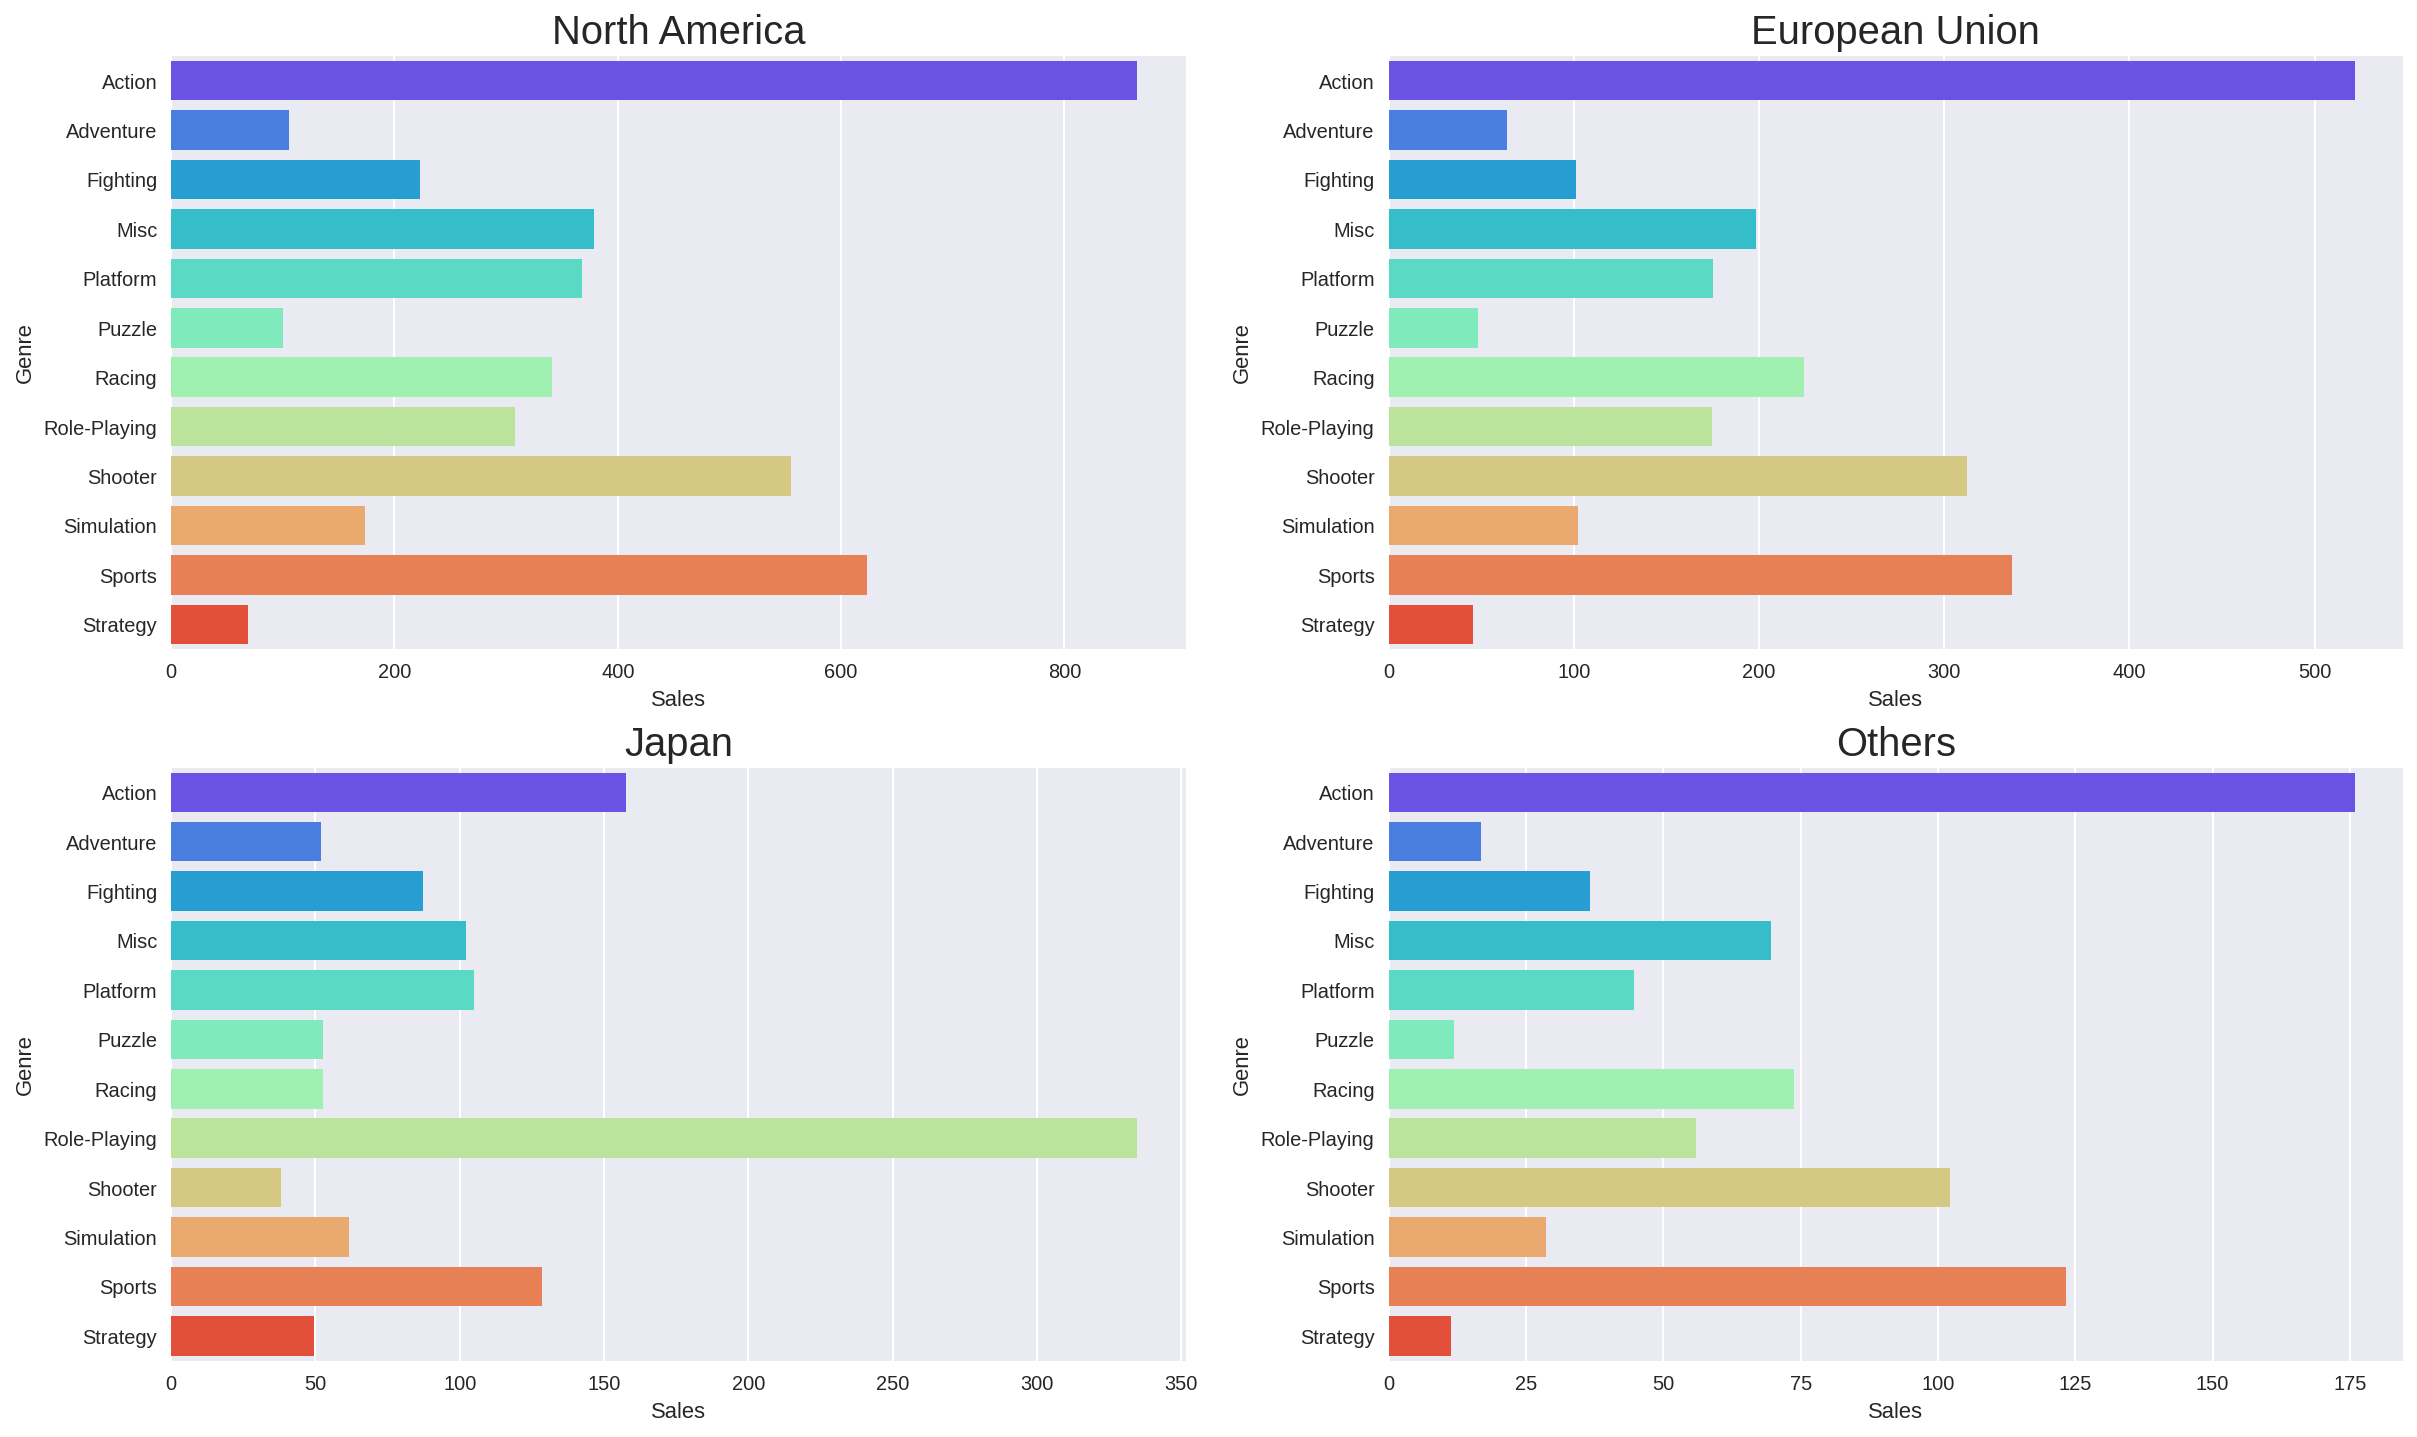

In [ ]:
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')
plt.figure(figsize = (20,12))
sns.set_palette('rainbow', genre_bar.shape[0])

ax1 = plt.subplot(2,2,1)
sns.barplot(y = genre_bar.index,x = genre_bar.iloc[:,0], ci = None)
plt.xlabel('Sales')
plt.title('North America', fontsize = 20)

ax2 = plt.subplot(2,2,2)
sns.barplot(y = genre_bar.index,x = genre_bar.iloc[:,1], ci = None)
plt.xlabel('Sales')
plt.title('European Union', fontsize = 20)

ax3 = plt.subplot(2,2,3)
sns.barplot(y = genre_bar.index,x = genre_bar.iloc[:,2], ci = None)
plt.xlabel('Sales')
plt.title('Japan', fontsize = 20)

ax4 = plt.subplot(2,2,4)
sns.barplot(y = genre_bar.index,x = genre_bar.iloc[:,3], ci = None)
plt.xlabel('Sales')
plt.title('Others', fontsize = 20)

### Q2. 연도별 게임의 트렌드가 존재하는가?
1. groupby('Year')를 사용해서 연도별 게임의 판매량 및 장르를 확인
2. 각 지역별 판매량을 연도별로 시각화(Use LIneplot, x = Year, y = sales)

#### 1. 연도별로 지역별 게임의 판매량 비교

In [ ]:
df_clean_2 = df_clean.copy()
df_clean_2.iloc[:,5:9] = df_clean_2.iloc[:,5:9]

In [ ]:
df_clean_2

Name Platform  Year  \
0                        Candace Kane's Candy Factory       DS  2008   
1                                      The Munchables      Wii  2009   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3                    Deal or No Deal: Special Edition       DS  2010   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16543                         Ice Age 2: The Meltdown       GC  2006   
16544                     Rainbow Islands: Revolution      PSP  2005   
16545                                        NBA 2K16      PS3  2015   
16546                     Toukiden: The Age of Demons      PSV  2013   
16547                        The King of Fighters '95       PS  1996   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action                    Destineer      0.04      0.00      0.00   
1         Action           Namco Bandai Games      0.17      0.00      0.00   
2      Adventure                    Alchemist      0.00      0.00      0.02   
3           Misc                    Zoo Games      0.04      0.00      0.00   
4       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16543   Platform                Vivendi Games      0.15      0.04      0.00   
16544     Action            Rising Star Games      0.01      0.00      0.00   
16545     Sports         Take-Two Interactive      0.44      0.19      0.03   
16546     Action                   Tecmo Koei      0.05      0.05      0.25   
16547   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  Sales_sum  
0             0.00       0.04  
1             0.01       0.18  
2             0.00       0.02  
3             0.00       0.04  
4             0.04       0.25  
...            ...        ...  
16543         0.01       0.20  
16544         0.00       0.01  
16545         0.13       0.79  
16546         0.03       0.38  
16547         0.01       0.17  

[16548 rows x 10 columns]

In [ ]:
df_clean_2.drop(df_clean_2.query("NA_Sales > 10").index, axis = 0, inplace = True)

In [ ]:
df_clean_year = df_clean_2.groupby('Year', as_index = False)['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

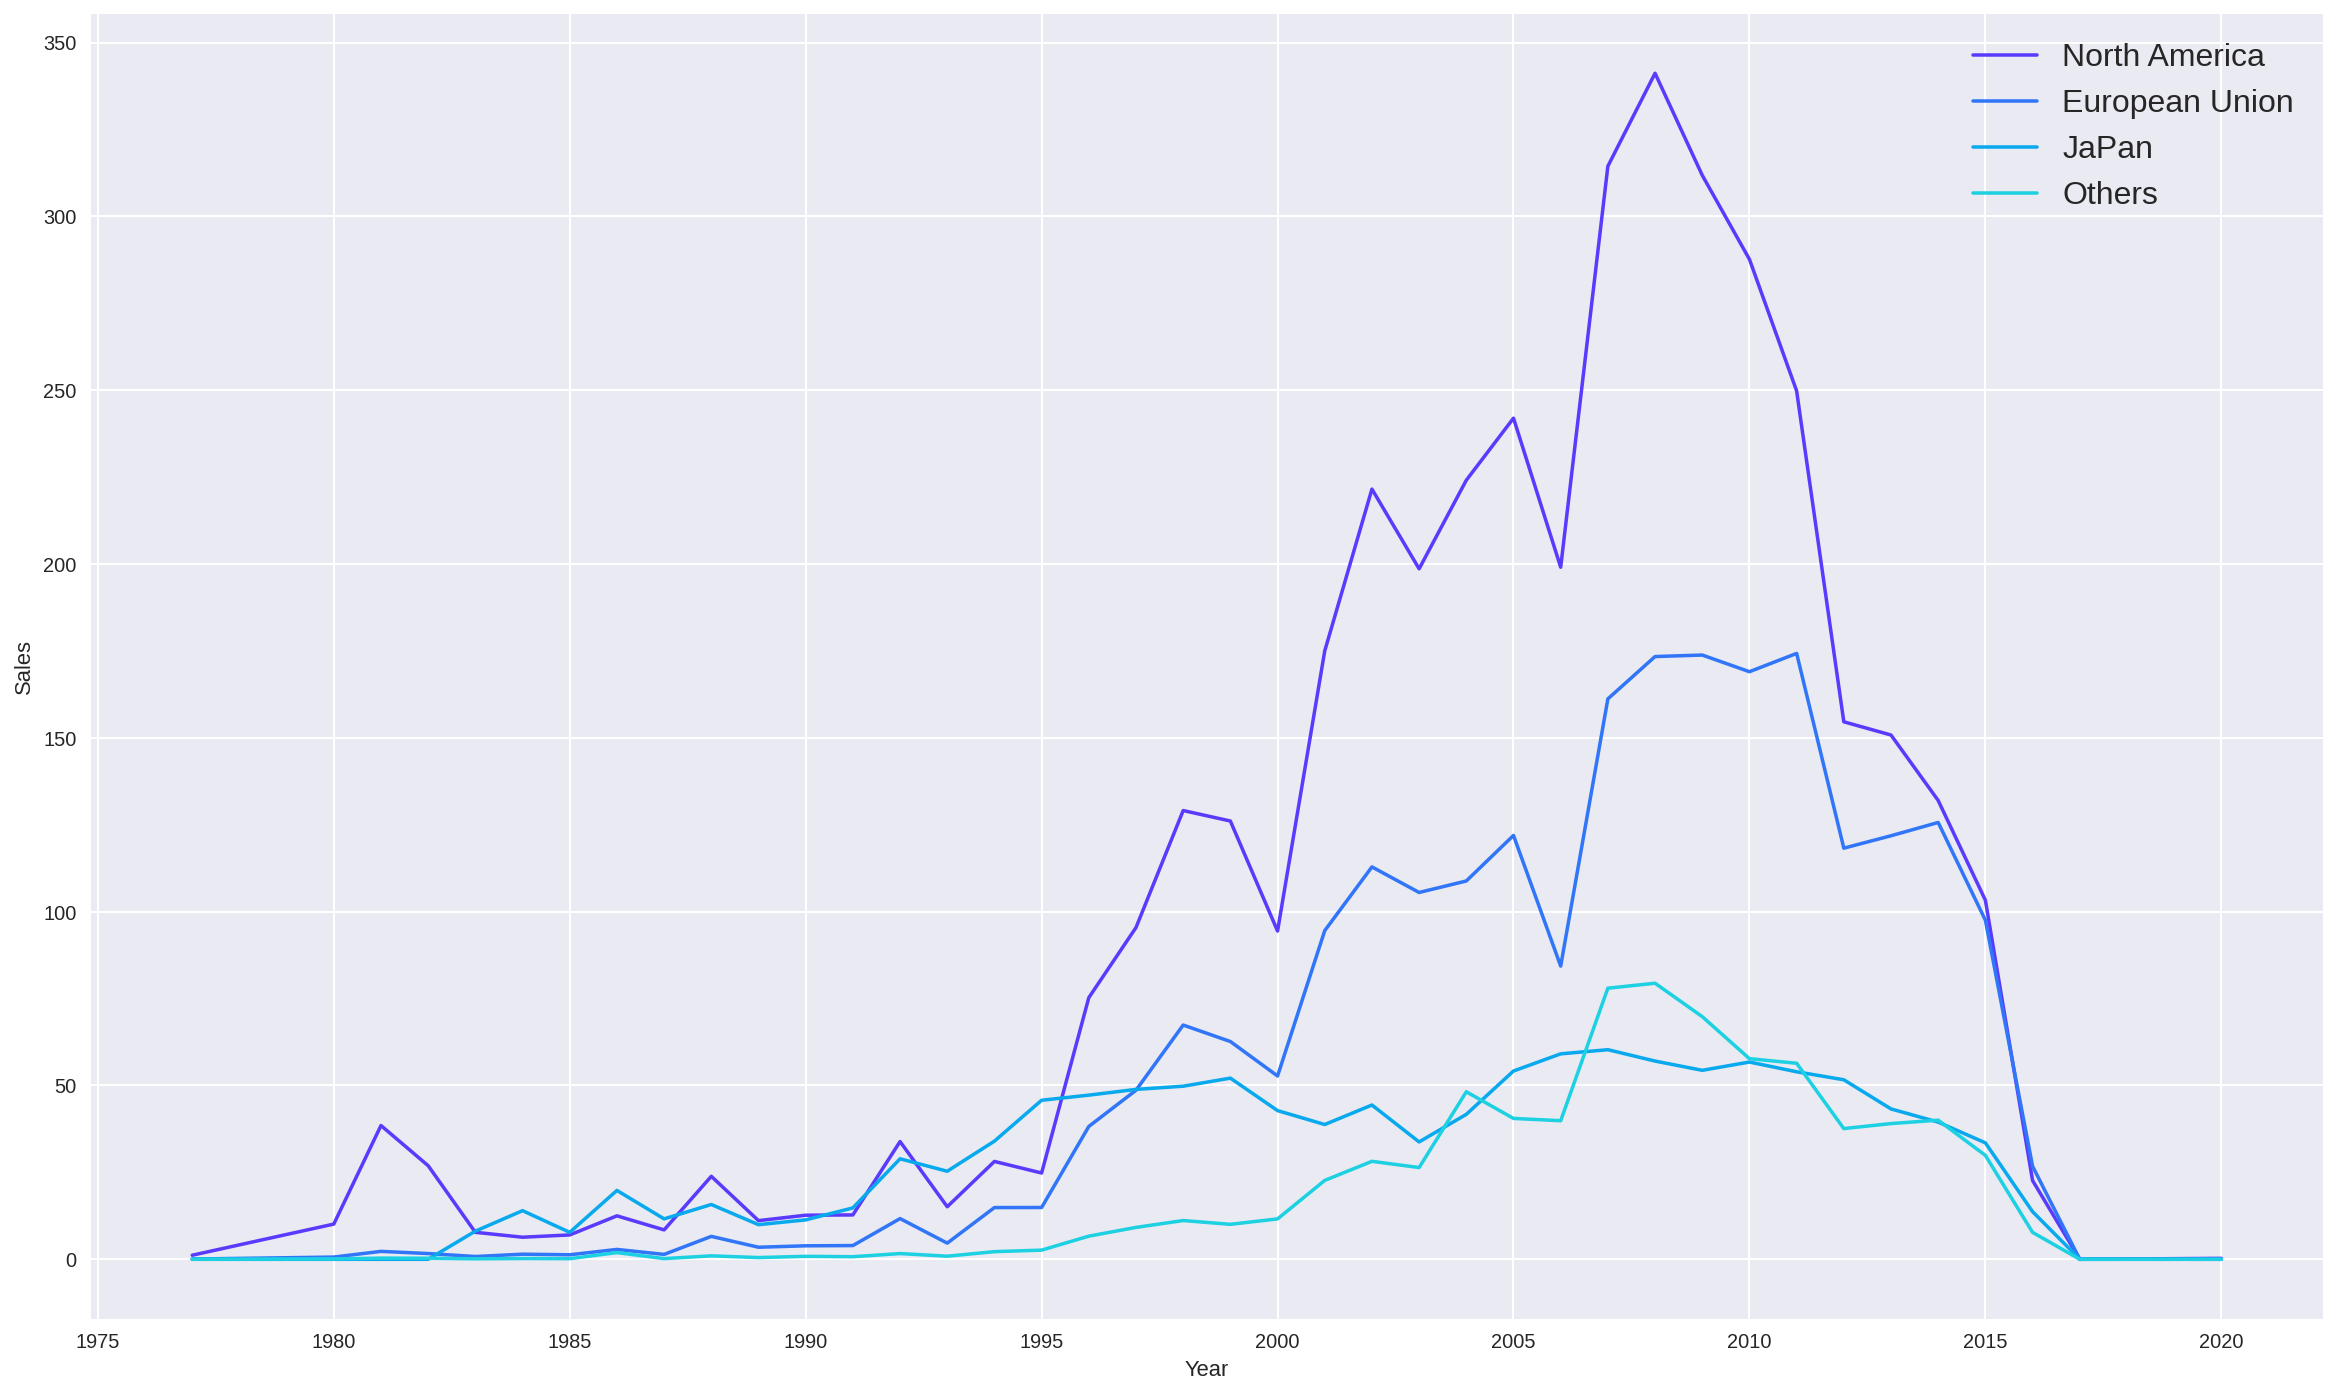

In [ ]:
plt.figure(figsize = [20,12])

sns.lineplot(x = df_clean_year.Year, y = df_clean_year.NA_Sales, label = "North America")
sns.lineplot(x = df_clean_year.Year, y = df_clean_year.EU_Sales, label = "European Union")
sns.lineplot(x = df_clean_year.Year, y = df_clean_year.JP_Sales, label = "JaPan")
sns.lineplot(x = df_clean_year.Year, y = df_clean_year.Other_Sales, label = "Others")

plt.legend(loc = 'upper right', fontsize = 16)
plt.ylabel('Sales')
plt.xticks(np.arange(1975, 2022, 5));

NA > EU > Other > JP 순으로 최고판매량의 차이가 존재함

먼저 각 연도마다 어떤 장르의 게임이 가장 많이 팔리게 됐는지 시각화(Lineplot)

- 지역별 판매량은 의미없으므로 판매량 총량변수(Sales_sum)만 추출

In [ ]:
df_trend = df_clean.copy()
df_trend = df_trend.loc[:, ['Year', 'Genre', 'Sales_sum']]
df_trend

Year      Genre  Sales_sum
0      2008     Action       0.04
1      2009     Action       0.18
2      2010  Adventure       0.02
3      2010       Misc       0.04
4      2010   Platform       0.25
...     ...        ...        ...
16543  2006   Platform       0.20
16544  2005     Action       0.01
16545  2015     Sports       0.79
16546  2013     Action       0.38
16547  1996   Fighting       0.17

[16548 rows x 3 columns]

In [ ]:
df_trend_count = df_trend.groupby(['Year', 'Genre'], as_index = False)['Sales_sum'].sum()
df_trend_count

Year         Genre  Sales_sum
0    1977        Action       1.25
1    1980        Action       0.34
2    1980      Fighting       0.77
3    1980          Misc       2.70
4    1980       Shooter       7.07
..    ...           ...        ...
385  2016        Sports      14.63
386  2016      Strategy       0.52
387  2017        Action       0.01
388  2017  Role-Playing       0.04
389  2020    Simulation       0.29

[390 rows x 3 columns]

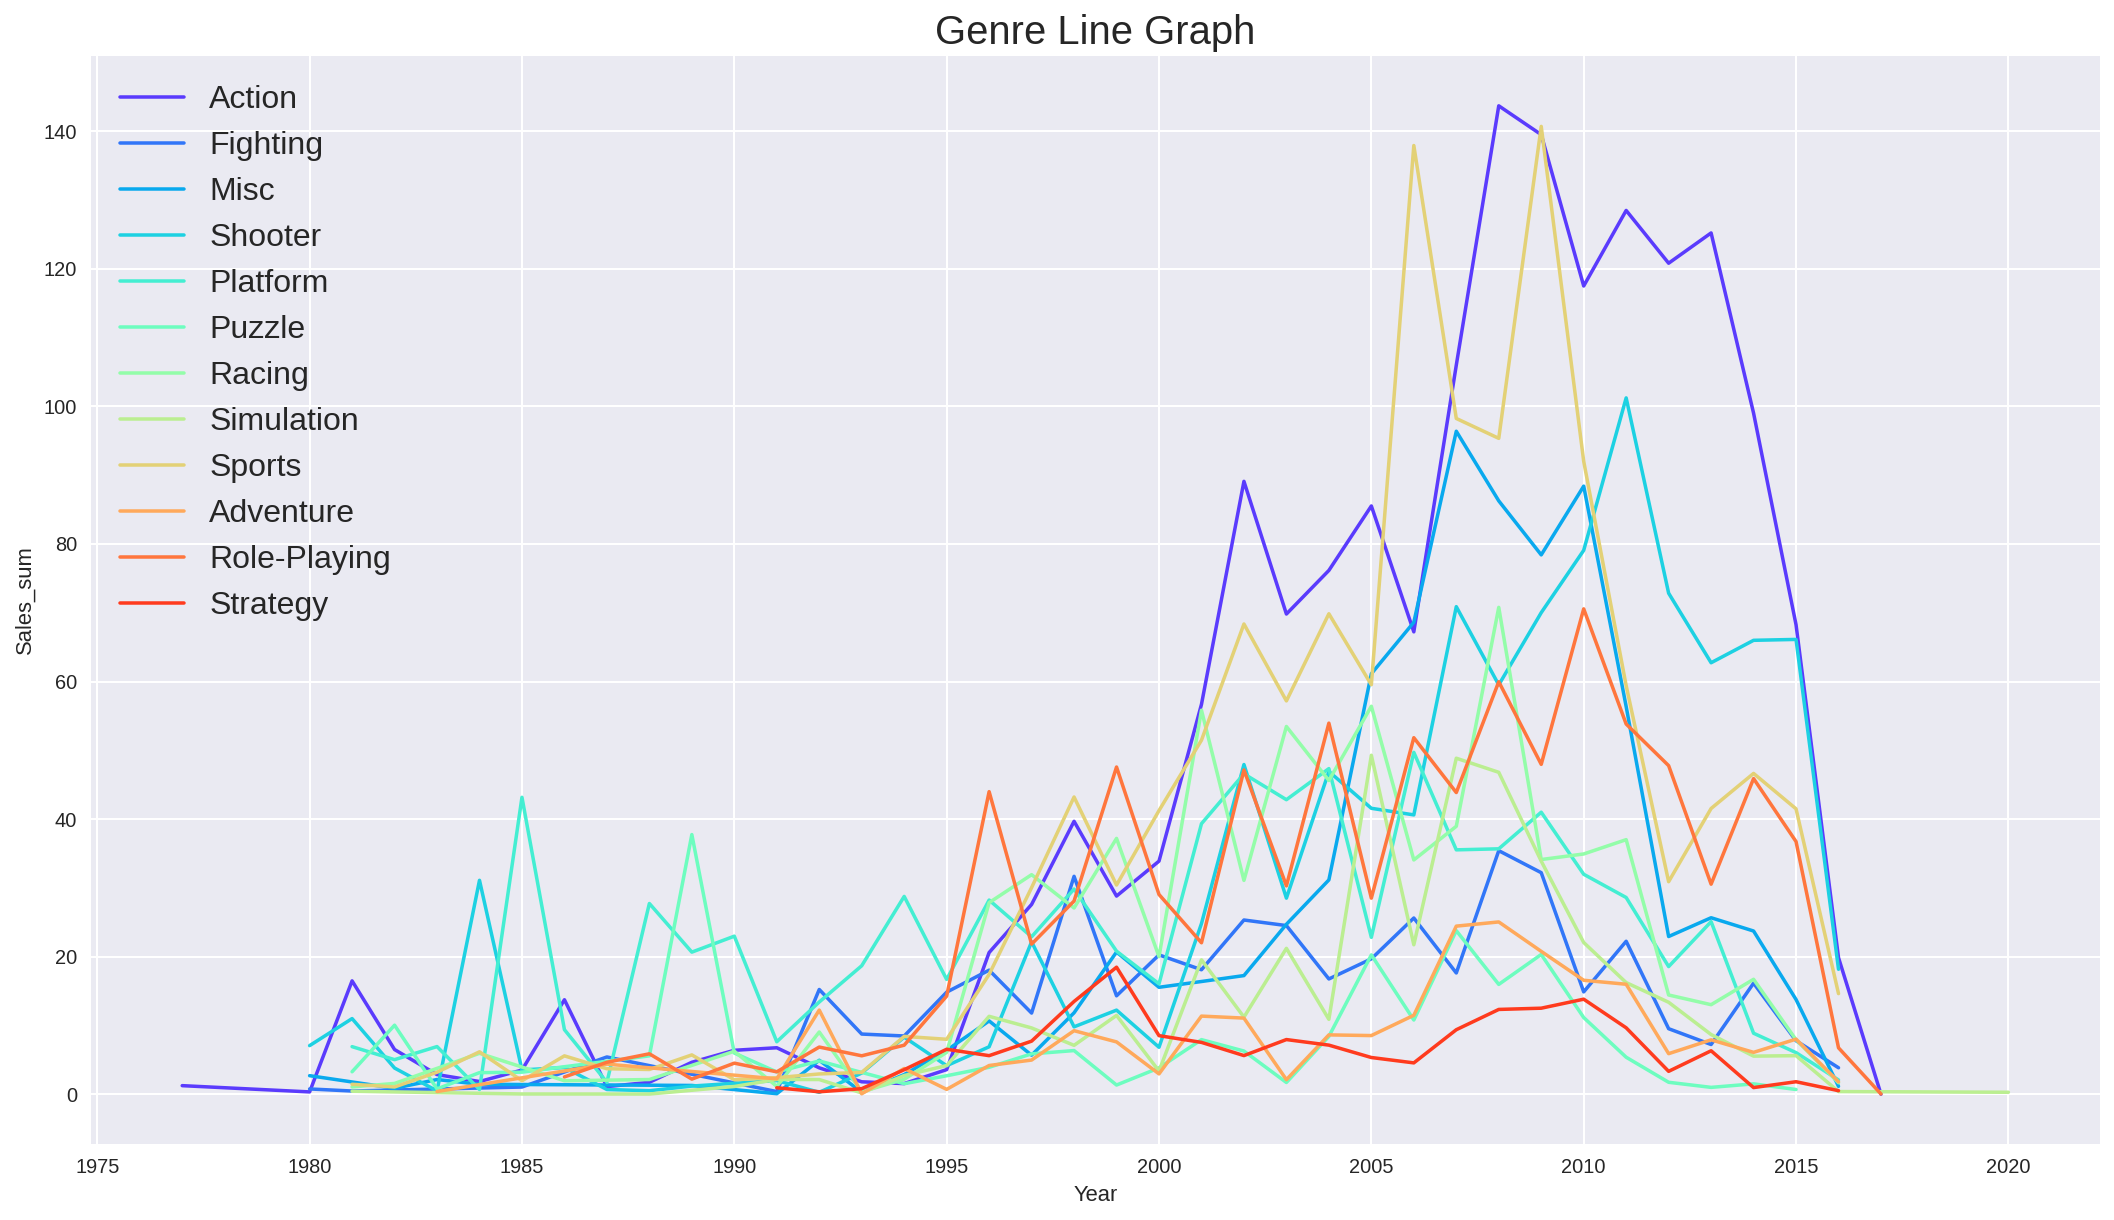

In [ ]:
plt.figure(figsize = [18,10])

sns.lineplot(x = df_trend_count.Year, y = df_trend_count.Sales_sum, hue = df_trend_count.Genre)
plt.xticks(np.arange(1975, 2022, 5))
plt.title('Genre Line Graph', fontsize = 20)
plt.legend(fontsize = 16)
plt.show();

- 각 연도에 어떤 장르의 게임이 인기가 있었는지 확실하게 알기 힘듬
- 특히, 80~90년도는 여러장르들이 너무 겹쳐서 알기가 매우 힘듬

=> 단순 개체수(판매량)을 시각화로 해서는 비교가 힘드므로 각 연도의 판매량의 비율로 바꿔서 계산한다.

In [ ]:
df_trend_sum = df_trend.groupby('Year')['Sales_sum'].sum()

In [ ]:
print('조사된 연도의 수 :', len(df_trend_sum))
df_trend_sum

조사된 연도의 수 : 40


Year
1977      1.25
1980     10.88
1981     41.10
1982     28.88
1983     16.80
1984     50.35
1985     56.48
1986     37.08
1987     21.70
1988     47.21
1989     73.45
1990     49.37
1991     32.23
1992     76.14
1993     45.99
1994     79.22
1995     88.11
1996    198.73
1997    202.10
1998    257.40
1999    250.88
2000    201.54
2001    331.01
2002    406.97
2003    364.29
2004    422.81
2005    458.56
2006    524.13
2007    613.91
2008    686.80
2009    671.40
2010    592.94
2011    534.40
2012    362.11
2013    354.93
2014    337.10
2015    264.24
2016     70.87
2017      0.05
2020      0.29
Name: Sales_sum, dtype: float64

In [ ]:
# 장르별 판매비율 = 각 연도의 장르별 판매량 / 각 연도의 총 판매량

df_trend_count[df_trend_count.Year == df_trend_sum.index[0]].loc[:,'Sales_sum'][0] / df_trend_sum.iloc[0]

1.0

In [ ]:
df_trend_ratio = df_trend_count.iloc[:,0:2]
ratio = []

for i in range(len(df_trend_sum)):
  for j in range(df_trend_count[df_trend_count.Year == df_trend_sum.index[i]].shape[0]):
    ratio.append(df_trend_count[df_trend_count.Year == df_trend_sum.index[i]].loc[:,'Sales_sum'].iloc[j] / df_trend_sum.iloc[i])


ratio = pd.Series(np.round(ratio,3))
df_trend_ratio['Sales_ratio'] = ratio
df_trend_ratio    # 각 연도에 따른 장르별 판매비율에 대한 데이터프레임

Year         Genre  Sales_ratio
0    1977        Action        1.000
1    1980        Action        0.031
2    1980      Fighting        0.071
3    1980          Misc        0.248
4    1980       Shooter        0.650
..    ...           ...          ...
385  2016        Sports        0.206
386  2016      Strategy        0.007
387  2017        Action        0.200
388  2017  Role-Playing        0.800
389  2020    Simulation        1.000

[390 rows x 3 columns]

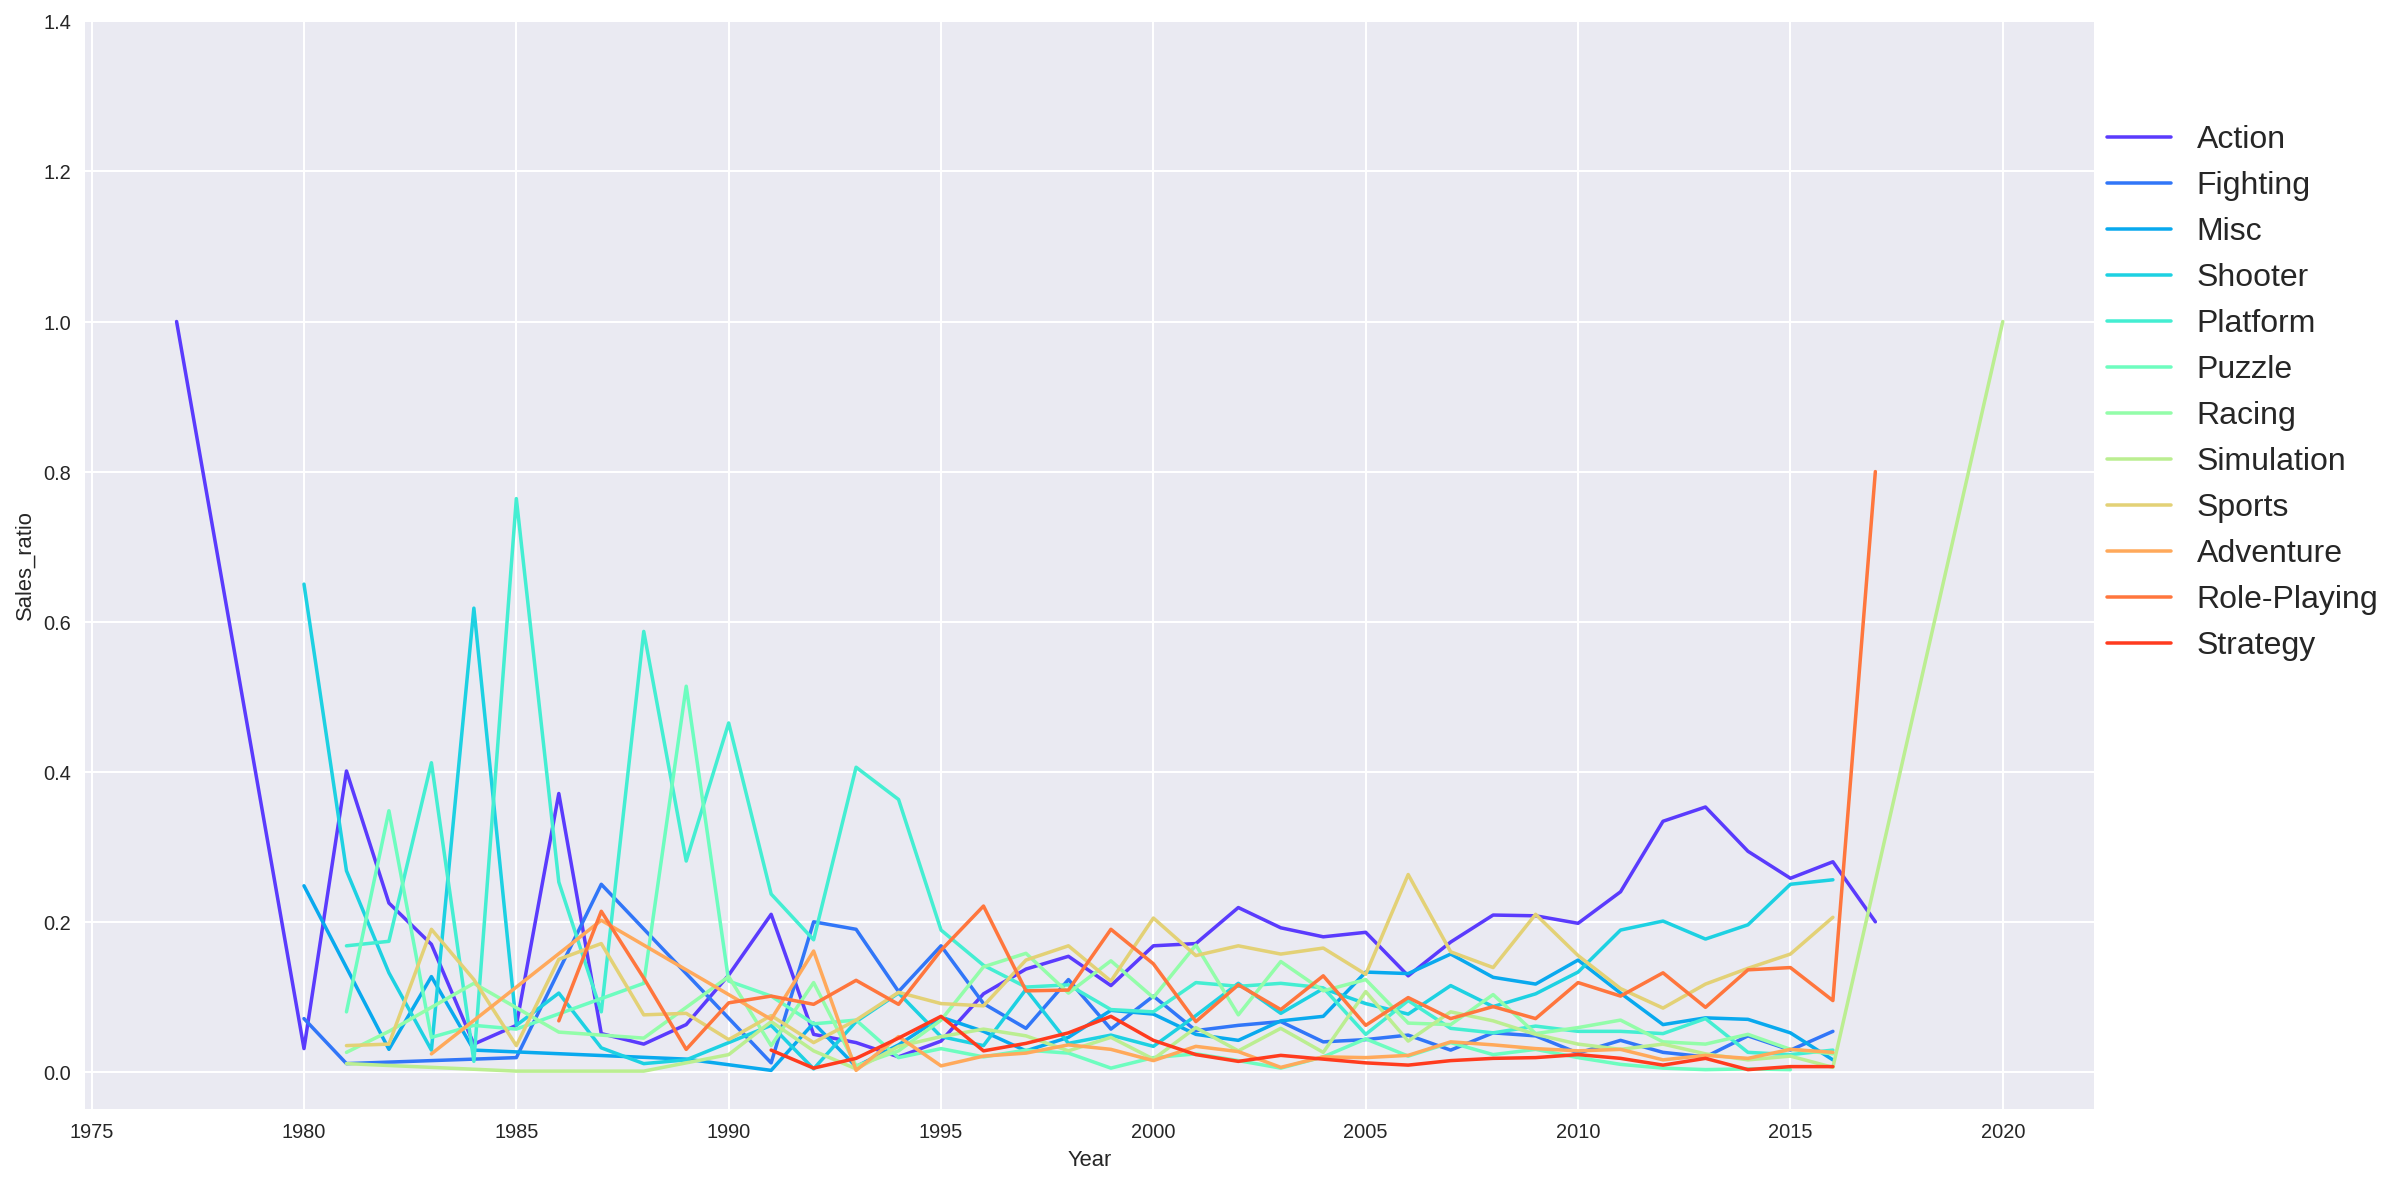

In [ ]:
plt.figure(figsize = [18,10])
sns.lineplot(x = df_trend_ratio.Year, y = df_trend_ratio.Sales_ratio, hue = df_trend_ratio.Genre)

plt.yticks(np.arange(0,1.6, 0.2))
plt.legend(loc = (1.0,0.4), ncol = 1, fontsize = 16)
plt.xticks(np.arange(1975, 2022, 5))
plt.show();

- 각 연도별로 비율을 정할 경우 하나의 장르만 팔렸던 연도는 비율이 매우 크게 나오기 때문에, 연도를 5년 간격으로 계급을 나눈다.

In [ ]:
# 8개의 계급으로 나누어짐

year1 = df_trend_count.query('Year <= 1985').groupby('Genre', as_index = False)['Sales_sum'].sum()
year2 = df_trend_count.query('Year > 1985 & Year <= 1990').groupby('Genre', as_index = False)['Sales_sum'].sum()
year3 = df_trend_count.query('Year > 1990 & Year <= 1995').groupby('Genre', as_index = False)['Sales_sum'].sum()
year4 = df_trend_count.query('Year > 1995 & Year <= 2000').groupby('Genre', as_index = False)['Sales_sum'].sum()
year5 = df_trend_count.query('Year > 2000 & Year <= 2005').groupby('Genre', as_index = False)['Sales_sum'].sum()
year6 = df_trend_count.query('Year > 2005 & Year <= 2010').groupby('Genre', as_index = False)['Sales_sum'].sum()
year7 = df_trend_count.query('Year > 2010 & Year <= 2015').groupby('Genre', as_index = False)['Sales_sum'].sum()
year8 = df_trend_count.query('Year > 2015').groupby('Genre', as_index = False)['Sales_sum'].sum()


In [ ]:
year1['Sales_ratio'] = year1.Sales_sum / year1.Sales_sum.sum()
year2['Sales_ratio'] = year2.Sales_sum / year2.Sales_sum.sum()
year3['Sales_ratio'] = year3.Sales_sum / year3.Sales_sum.sum()
year4['Sales_ratio'] = year4.Sales_sum / year4.Sales_sum.sum()
year5['Sales_ratio'] = year5.Sales_sum / year5.Sales_sum.sum()
year6['Sales_ratio'] = year6.Sales_sum / year6.Sales_sum.sum()
year7['Sales_ratio'] = year7.Sales_sum / year7.Sales_sum.sum()
year8['Sales_ratio'] = year8.Sales_sum / year8.Sales_sum.sum()

In [ ]:
year1['Years'] = np.repeat('86년도 이전', len(year1))
year2['Years'] = np.repeat('86~90년도', len(year2))
year3['Years'] = np.repeat('91~95년도', len(year3))
year4['Years'] = np.repeat('96~00년도', len(year4))
year5['Years'] = np.repeat('01~05년도', len(year5))
year6['Years'] = np.repeat('06~10년도', len(year6))
year7['Years'] = np.repeat('11~15년도', len(year7))
year8['Years'] = np.repeat('15년도 이후', len(year8))

In [ ]:
df_years_ratio = year1.append([year2, year3, year4, year5, year6, year7, year8], ignore_index = True)
df_years_ratio

Genre  Sales_sum  Sales_ratio    Years
0         Action      32.80     0.159425  86년도 이전
1      Adventure       0.40     0.001944  86년도 이전
2       Fighting       2.29     0.011131  86년도 이전
3           Misc       7.16     0.034801  86년도 이전
4       Platform      62.74     0.304948  86년도 이전
..           ...        ...          ...      ...
87  Role-Playing       6.79     0.095352  15년도 이후
88       Shooter      18.17     0.255161  15년도 이후
89    Simulation       0.68     0.009549  15년도 이후
90        Sports      14.63     0.205449  15년도 이후
91      Strategy       0.52     0.007302  15년도 이후

[92 rows x 4 columns]

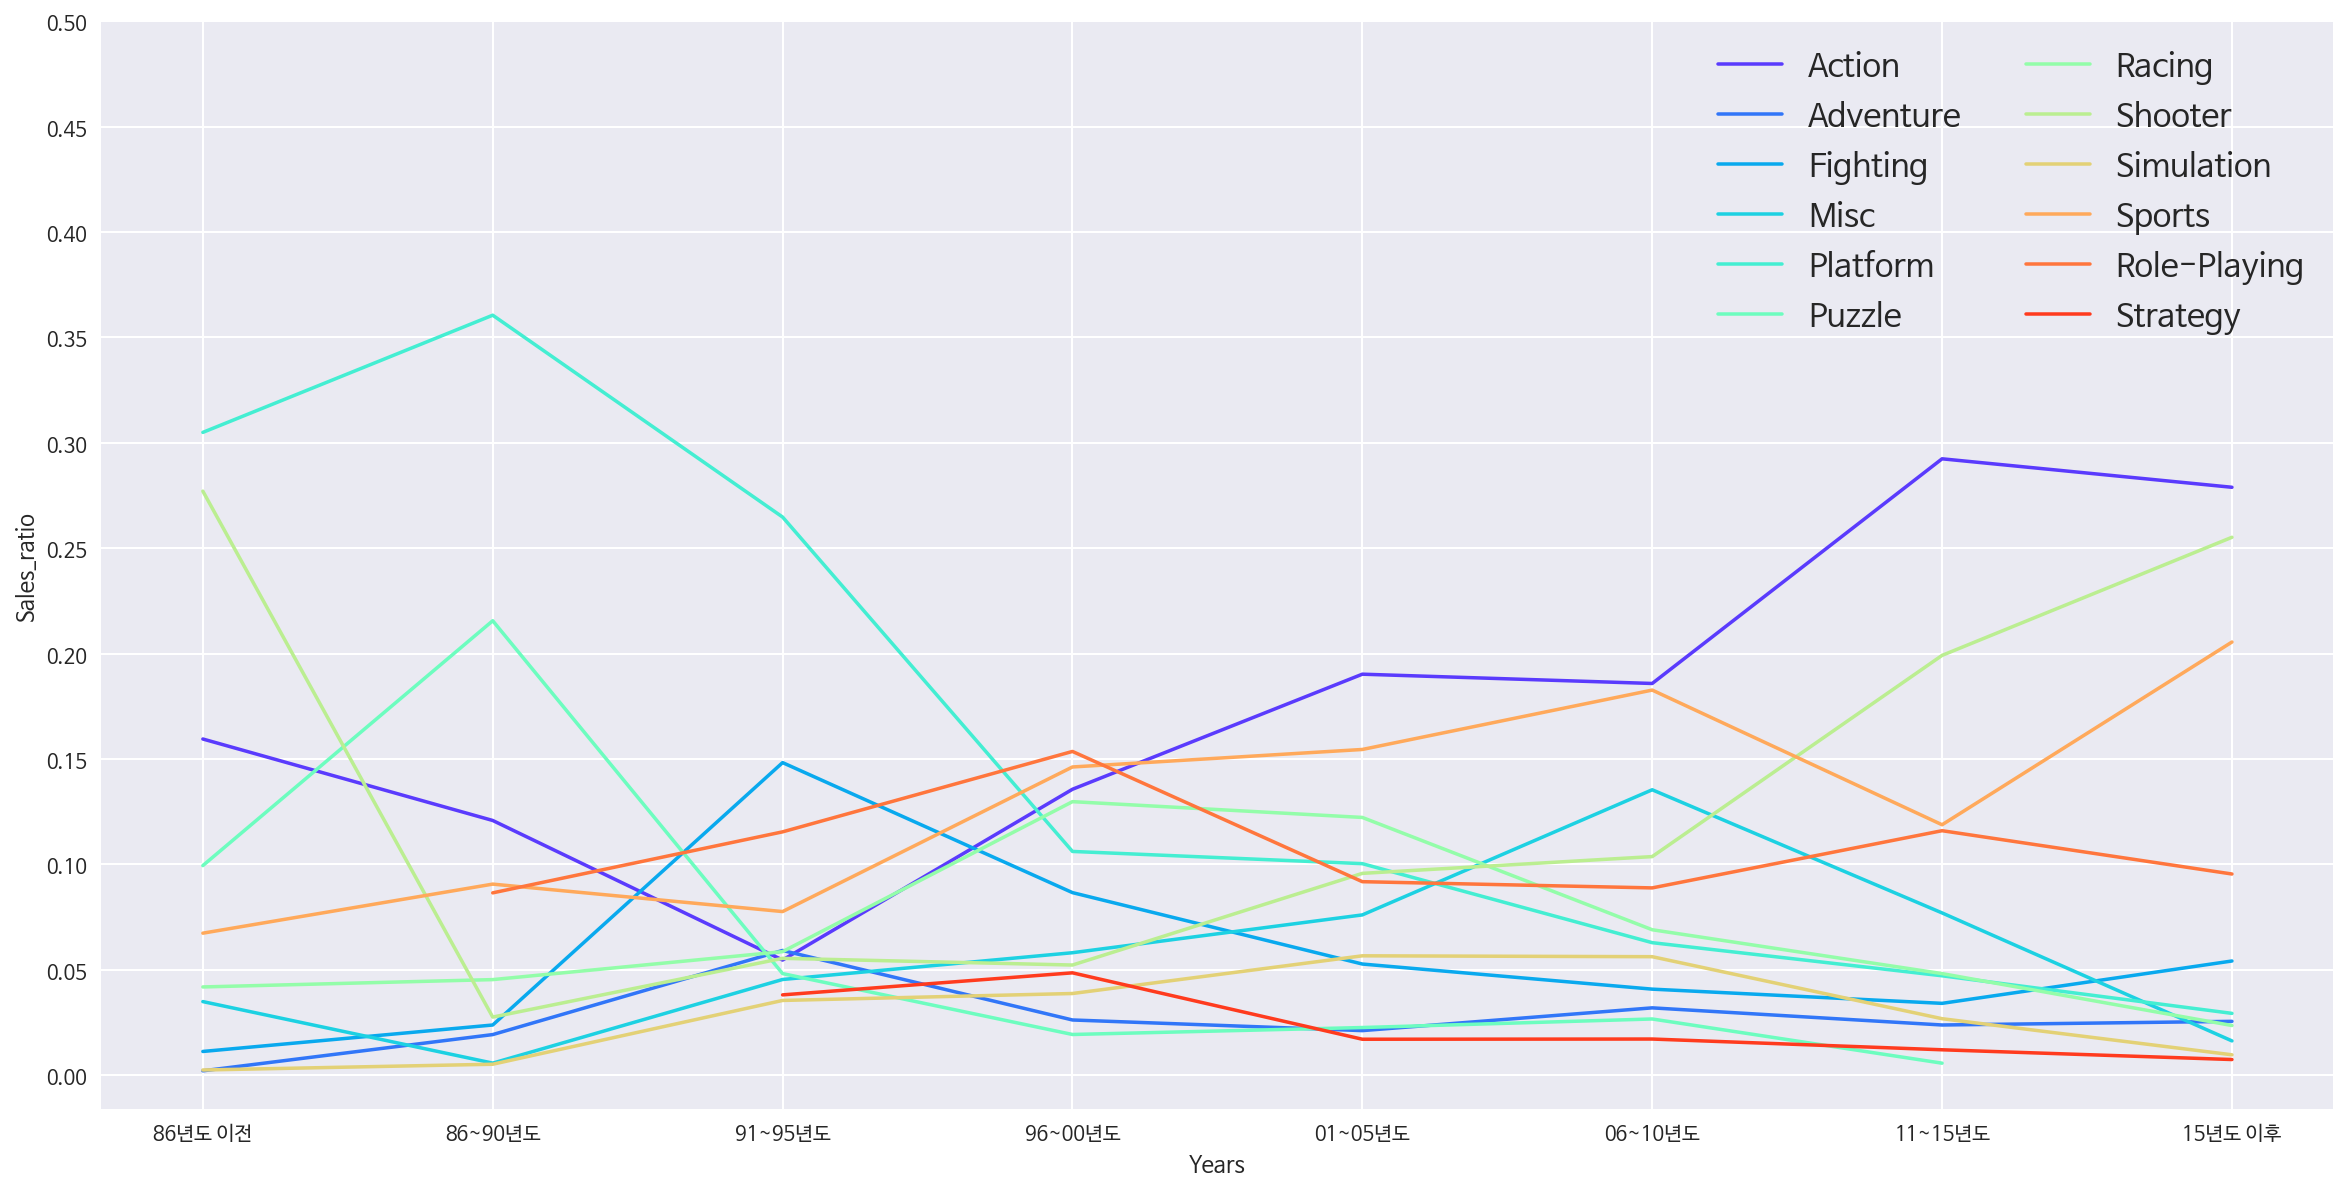

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize = [20,10])
sns.lineplot(x = df_years_ratio.Years, y = df_years_ratio.Sales_ratio, hue = df_years_ratio.Genre)

plt.legend(loc = 'best', ncol = 2, fontsize = 16)
plt.yticks(np.arange(0,0.55, 0.05))
plt.show()
#plt.xticks(['85년도 이전','86~90년도','91~95년도','96~00년도','01~05년도','06~10년도','11~15년도','16년도 이후'])

- 위의 그래프를 통해서
86년도 이전부터 95년도 까지는 `Platform` 장르의 게임이 가장 많은 비율로 판매되었음을 알 수 있다.
96~00년도에는 `Role Playing` 장르가 근소한 차이로 가장 높지만, 이후 01년도부터 현재까지는 `Action` 장르의 게임이 가장 많은 비율로 판매됨을 알 수 있다.

- 추가적으로 00년도 이후부터 게임장르의 트렌드에 대한 변화가 적게 나타나는 것처럼 보이기 때문에 이후 분석은 00년도 이후에 대한 분석으로 **`최근 20년간`**의 게임 트렌드를 분석하기로 한다.

### Q3. 출고량이 높은 게임들에 대해서 분석

- <h4> 전체 판매량(Sales_sum)에서 인기가 많은 게임들에 대한 비율을 원그래프로 표현

In [ ]:
# 최근 20년간에 해당되는 데이터프레임만 추출

df_recent = df_clean.query('Year > 2000').reset_index(drop = True)
df_recent

Name Platform  Year  \
0                        Candace Kane's Candy Factory       DS  2008   
1                                      The Munchables      Wii  2009   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3                    Deal or No Deal: Special Edition       DS  2010   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
14200                                Minna no Chizu 2      PSP  2007   
14201                         Ice Age 2: The Meltdown       GC  2006   
14202                     Rainbow Islands: Revolution      PSP  2005   
14203                                        NBA 2K16      PS3  2015   
14204                     Toukiden: The Age of Demons      PSV  2013   

           Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action             Destineer      0.04      0.00      0.00   
1         Action    Namco Bandai Games      0.17      0.00      0.00   
2      Adventure             Alchemist      0.00      0.00      0.02   
3           Misc             Zoo Games      0.04      0.00      0.00   
4       Platform           D3Publisher      0.12      0.09      0.00   
...          ...                   ...       ...       ...       ...   
14200       Misc                Zenrin      0.00      0.00      0.02   
14201   Platform         Vivendi Games      0.15      0.04      0.00   
14202     Action     Rising Star Games      0.01      0.00      0.00   
14203     Sports  Take-Two Interactive      0.44      0.19      0.03   
14204     Action            Tecmo Koei      0.05      0.05      0.25   

       Other_Sales  Sales_sum  
0             0.00       0.04  
1             0.01       0.18  
2             0.00       0.02  
3             0.00       0.04  
4             0.04       0.25  
...            ...        ...  
14200         0.00       0.02  
14201         0.01       0.20  
14202         0.00       0.01  
14203         0.13       0.79  
14204         0.03       0.38  

[14205 rows x 10 columns]

- 지역별로 어떤 게임이 가장 잘 팔리는지 원그래프를 통해 비율을 시각화한다.

In [ ]:
df_NA = df_recent.iloc[:,0:6].sort_values('NA_Sales', ascending = False).reset_index(drop = True)
df_NA

Name Platform  Year         Genre  \
0                           Wii Sports      Wii  2006        Sports   
1                       Mario Kart Wii      Wii  2008        Racing   
2                    Wii Sports Resort      Wii  2009        Sports   
3                   Kinect Adventures!     X360  2010          Misc   
4            New Super Mario Bros. Wii      Wii  2009      Platform   
...                                ...      ...   ...           ...   
14200  World Snooker Championship 2007      PS3  2007        Sports   
14201                         SingStar      PS2  2004          Misc   
14202    Ar tonelico: Melody of Elemia      PS2  2006  Role-Playing   
14203             Metal Fight Beyblade       DS  2009        Action   
14204              Tom Clancy's HAWX 2       PC  2010        Action   

                         Publisher  NA_Sales  
0                         Nintendo     41.49  
1                         Nintendo     15.85  
2                         Nintendo     15.75  
3           Microsoft Game Studios     14.97  
4                         Nintendo     14.59  
...                            ...       ...  
14200                         Sega      0.00  
14201  Sony Computer Entertainment      0.00  
14202                    505 Games      0.00  
14203                  Hudson Soft      0.00  
14204                      Ubisoft      0.00  

[14205 rows x 6 columns]

In [ ]:
df_EU = df_recent.iloc[:,[0,1,2,3,4,6]].sort_values('EU_Sales', ascending = False).reset_index(drop = True)
df_JP = df_recent.iloc[:,[0,1,2,3,4,7]].sort_values('JP_Sales', ascending = False).reset_index(drop = True)
df_Other = df_recent.iloc[:,[0,1,2,3,4,8]].sort_values('Other_Sales', ascending = False).reset_index(drop = True)
df_All = df_recent.iloc[:,[0,1,2,3,4,9]].sort_values('Sales_sum', ascending = False).reset_index(drop = True)

- 각 지역별 판매량에서 상위 10개만 추출해서 원그래프로 비율을 시각화(Pie)
- 게임들 중 여러 플랫폼을 지원하는 게임들이 존재하기 때문에 각 게임들의 지역별 총 판매량을 groupby를 통해 구한다.

In [ ]:
df_NA10 = df_NA.groupby(['Name'], as_index = False).NA_Sales.sum().sort_values('NA_Sales', ascending = False).head(10)
df_EU10 = df_EU.groupby(['Name'], as_index = False).EU_Sales.sum().sort_values('EU_Sales', ascending = False).head(10)
df_JP10 = df_JP.groupby(['Name'], as_index = False).JP_Sales.sum().sort_values('JP_Sales', ascending = False).head(10)
df_Other10 = df_Other.groupby(['Name'], as_index = False).Other_Sales.sum().sort_values('Other_Sales', ascending = False).head(10)
df_All10 = df_All.groupby(['Name'], as_index = False).Sales_sum.sum().sort_values('Sales_sum', ascending = False).head(10)

In [ ]:
df_NA10['ratio'] = np.round((df_NA10.NA_Sales / df_NA10.NA_Sales.sum())*100 ,2)
df_EU10['ratio'] = np.round((df_EU10.EU_Sales / df_EU10.EU_Sales.sum())*100 ,2)
df_JP10['ratio'] = np.round((df_JP10.JP_Sales / df_JP10.JP_Sales.sum())*100 ,2)
df_Other10['ratio'] = np.round((df_Other10.Other_Sales / df_Other10.Other_Sales.sum())*100 ,2)
df_All10['ratio'] = np.round((df_All10.Sales_sum / df_All10.Sales_sum.sum())*100 ,2)

In [ ]:
explode = [0.15, 0.125, 0.1, 0.075, 0.05, 0,0,0,0,0]
wedgeprops = {'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}

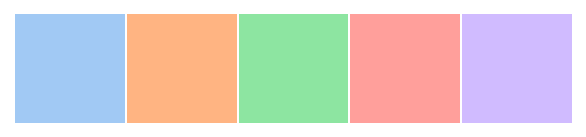

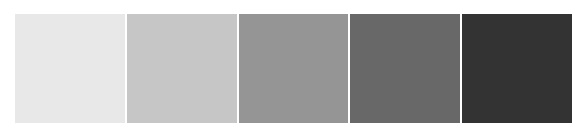

In [ ]:
pallete_color = sns.color_palette('pastel',5)
sns.palplot(pallete_color)

sequence_color = sns.color_palette('Greys',5)
sns.palplot(sequence_color)

In [ ]:
df_NA10.iloc[5:10,2]

987     8.27
4010    7.95
985     7.92
5517    7.75
983     7.48
Name: ratio, dtype: float64

In [ ]:
df_clean[df_clean.Name == 'Pokemon Black/Pokemon White']

Name Platform  Year         Genre Publisher  \
10593  Pokemon Black/Pokemon White       DS  2010  Role-Playing  Nintendo   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum  
10593      5.57      3.28      5.65         0.82      15.32

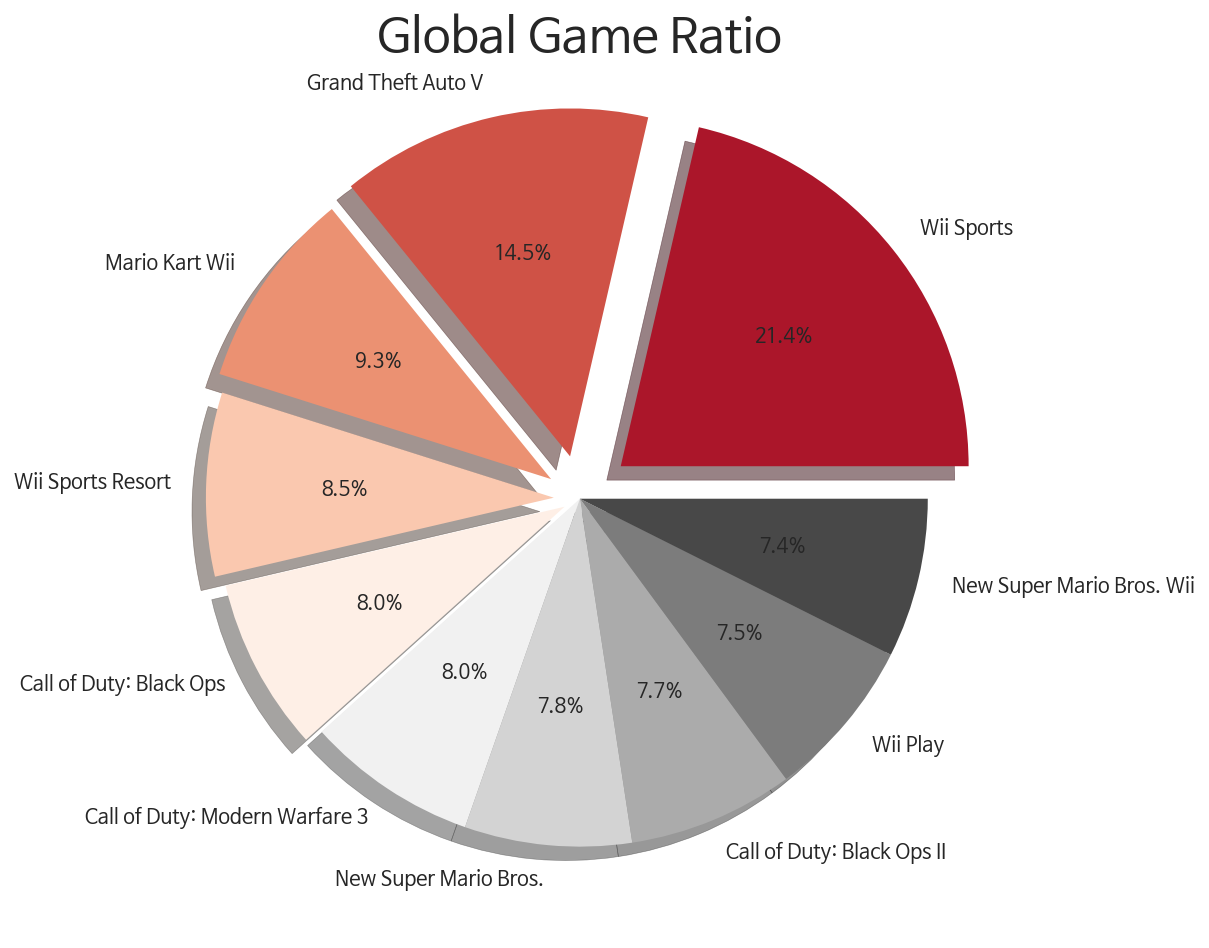

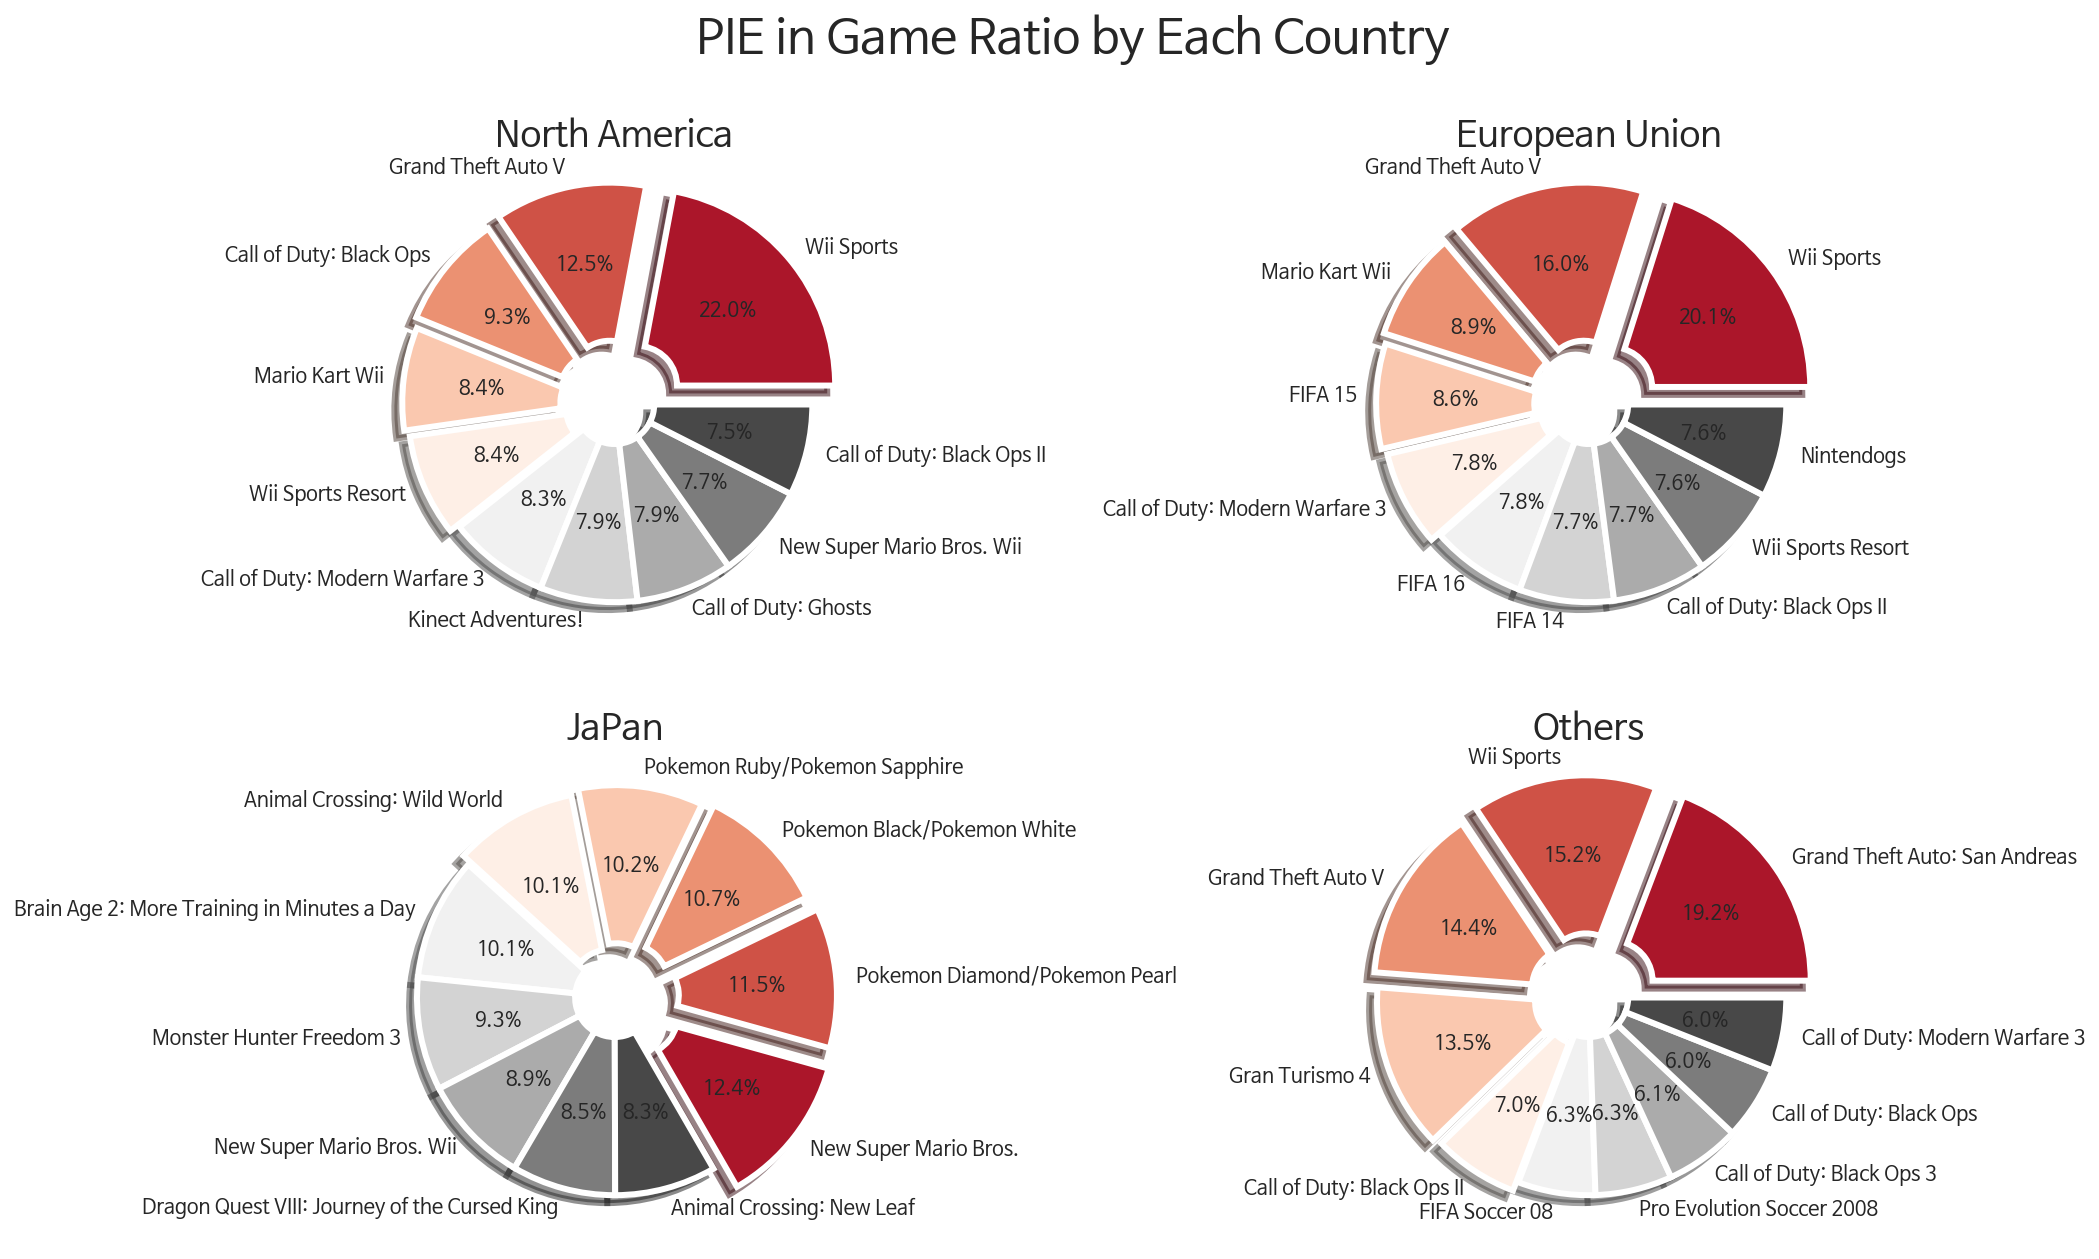

In [ ]:
plt.figure(figsize = (14,8))
sns.set_palette('RdGy', 10)

plt.pie(df_All10.ratio, labels = df_All10.Name, autopct = '%.1f%%', explode = explode, shadow = True, )
plt.title('Global Game Ratio', fontsize = 24)

plt.show()

plt.figure(figsize = [16,10])
plt.suptitle('PIE in Game Ratio by Each Country', fontsize = 24)
sns.set_palette('RdGy', 10)

ax1 = plt.subplot(2,2,1)

plt.pie(df_NA10.ratio, labels = df_NA10.Name,  autopct = '%.1f%%', wedgeprops = wedgeprops, explode = explode, shadow = True)
plt.title('North America', fontsize = 18)


ax2 = plt.subplot(2,2,2)
plt.pie(df_EU10.ratio, labels = df_EU10.Name, autopct = '%.1f%%', explode = explode, wedgeprops = wedgeprops, shadow = True)
plt.title('European Union', fontsize = 18)

ax3 = plt.subplot(2,2,3)
plt.pie(df_JP10.ratio, labels = df_JP10.Name, autopct = '%.1f%%', explode = explode, wedgeprops = wedgeprops, shadow = True, startangle=300)
plt.title('JaPan', fontsize = 18)

ax4 = plt.subplot(2,2,4)
plt.pie(df_Other10.ratio, labels = df_Other10.Name, autopct = '%.1f%%', explode = explode, wedgeprops = wedgeprops, shadow = True)
plt.title('Others', fontsize = 18)

plt.show()

- 위의 그래프를 통해 북미와 유럽의 경우에는 00년 이후 Wii Sports가 가장 인기가 많았으며 뒤이어 GTA 5가 두 번째로 인기가 많은 것을 알 수 있다.
- 일본의 경우 New Super Mario Bros가 가장 인기가 많으면서 Poketmon Diamond가 그와 비슷하게 인기가 많은 것을 알 수 있다.
- NA,EU,JP를 제외한 나머지 판매량의 비율을 살펴보면 GTA:San Andreas가 가장 많이 팔렸으며 뒤이어 Wii Sports가 두 번째로 많이 팔렸다는 것을 확인할 수 있다.

#### 위의 그래프를 통해 지역별 인기있는 게임들을 살펴볼 수 있음, 이 중 지역별 인기 순위 top5내에 해당되는 장르 또는 플랫폼에 대해 조사


##### 1. NA에서 가장 많이 판매되었던 게임들의 지원플랫폼 및 장르를 시각화

In [ ]:
# 최근 20년간 북미에서 출고량이 가장 높은 장르 5개를 선택
NA_5 = df_recent.groupby('Genre', as_index = False).NA_Sales.sum().sort_values('NA_Sales', ascending = False).reset_index(drop = True).head(5)
EU_5 = df_recent.groupby('Genre', as_index = False).EU_Sales.sum().sort_values('EU_Sales', ascending = False).reset_index(drop = True).head(5)
JP_5 = df_recent.groupby('Genre', as_index = False).JP_Sales.sum().sort_values('JP_Sales', ascending = False).reset_index(drop = True).head(5)
Other_5 = df_recent.groupby('Genre', as_index = False).Other_Sales.sum().sort_values('Other_Sales', ascending = False).reset_index(drop = True).head(5)

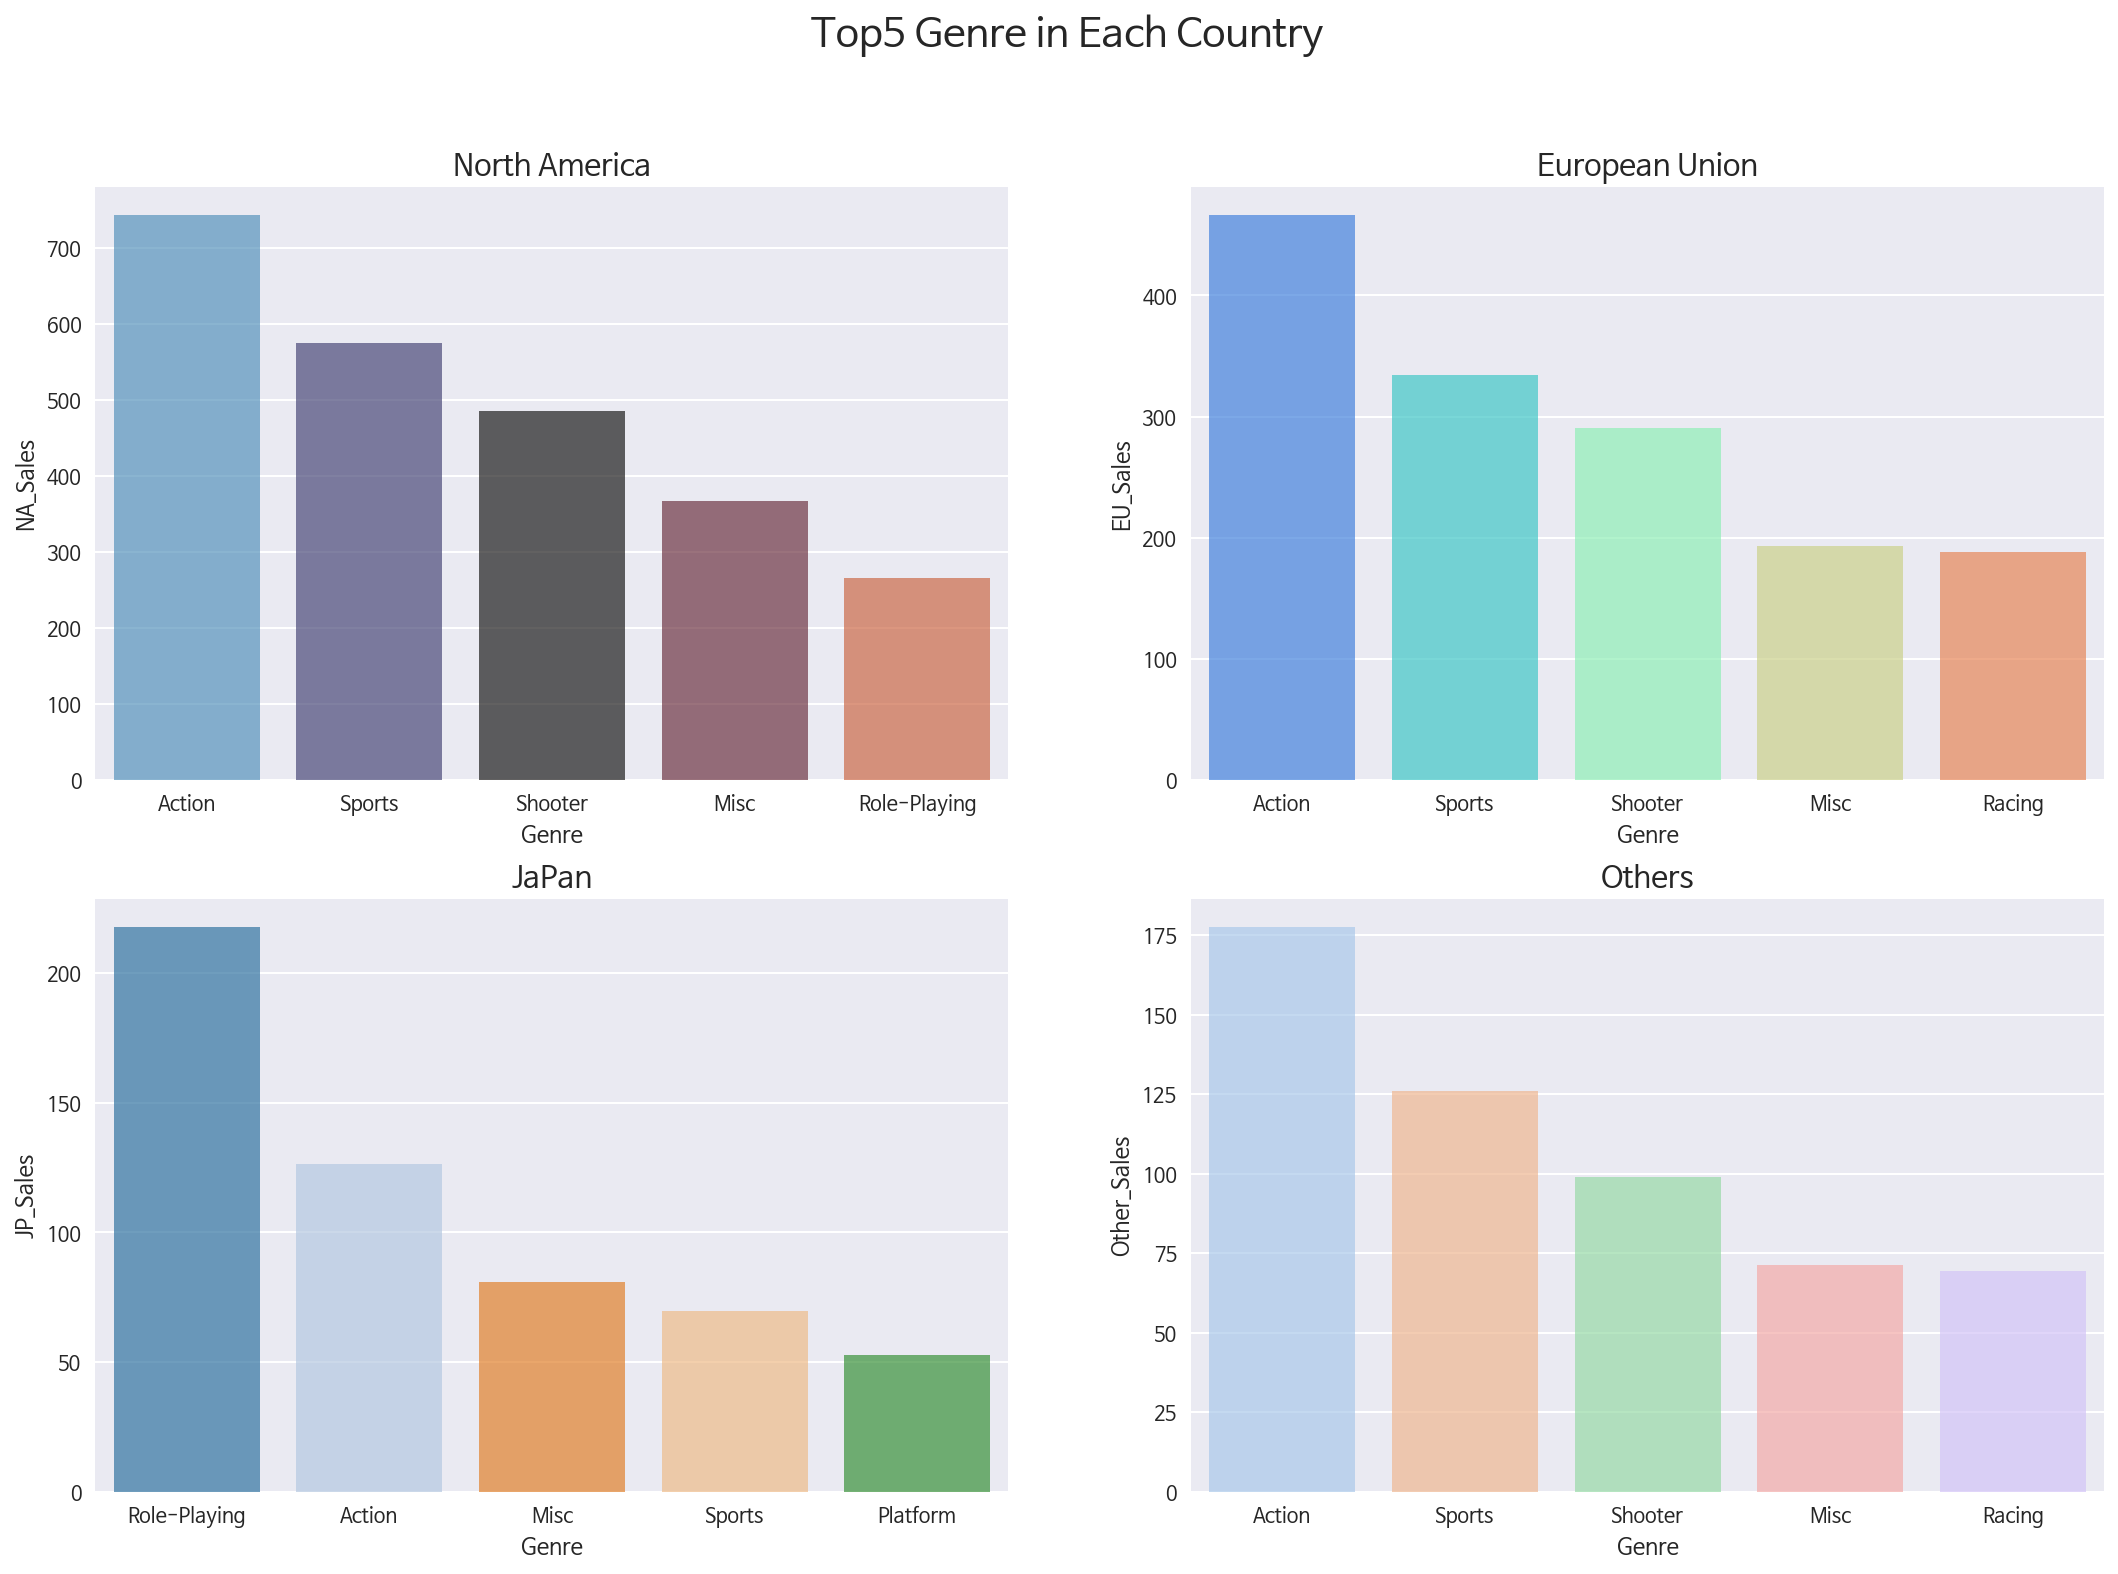

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize = [18,12])
plt.suptitle('Top5 Genre in Each Country', fontsize = 20)

ax1 = plt.subplot(2,2,1)
sns.set_palette('icefire',5)
sns.barplot(x = NA_5.Genre, y = NA_5.NA_Sales, alpha = 0.7)
plt.title('North America', fontsize = 15)

ax2 = plt.subplot(2,2,2)
sns.set_palette('rainbow',5)
sns.barplot(x = EU_5.Genre, y = EU_5.EU_Sales, alpha = 0.7)
plt.title('European Union', fontsize = 15)

ax3 = plt.subplot(2,2,3)
sns.set_palette('tab20',5)
sns.barplot(x = JP_5.Genre, y = JP_5.JP_Sales, alpha = 0.7)
plt.title('JaPan', fontsize = 15)

ax4 = plt.subplot(2,2,4)
sns.set_palette('pastel',5)
sns.barplot(x = Other_5.Genre, y = Other_5.Other_Sales, alpha = 0.7)
plt.title('Others', fontsize = 15)

plt.show()

In [ ]:
# 최근 20년간 각 지역별 플랫폼에 따른 판매량비교 시각화(Area Plot)
## 각 연도에 따른 플랫폼별 평균 판매량의 증가량을 확인해서 어떤 플랫폼이 최근 트렌드가 되는지를 확인할 수 있다.
## 평균을 사용하는이유: 인기가 있는 게임들은 플랫폼에 관계없이 판매량이 많기 떄문

NA_platform = df_recent.groupby(['Year','Platform'], as_index = False).NA_Sales.mean()
NA_platform

Year Platform  NA_Sales
0    2001       DC  0.000000
1    2001       GB  0.273000
2    2001      GBA  0.357570
3    2001       GC  0.768636
4    2001      N64  0.231111
..    ...      ...       ...
140  2016     X360  0.045000
141  2016     XOne  0.123889
142  2017      PS4  0.000000
143  2017      PSV  0.000000
144  2020       DS  0.270000

[145 rows x 3 columns]

In [ ]:
df_recent[df_recent.Year == 2017]

Name Platform  Year  \
4551                   Brothers Conflict: Precious Baby      PSV  2017   
8654   Phantasy Star Online 2 Episode 4: Deluxe Package      PS4  2017   
13043  Phantasy Star Online 2 Episode 4: Deluxe Package      PSV  2017   

              Genre     Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
4551         Action  Idea Factory       0.0       0.0      0.01          0.0   
8654   Role-Playing          Sega       0.0       0.0      0.03          0.0   
13043  Role-Playing          Sega       0.0       0.0      0.01          0.0   

       Sales_sum  
4551        0.01  
8654        0.03  
13043       0.01

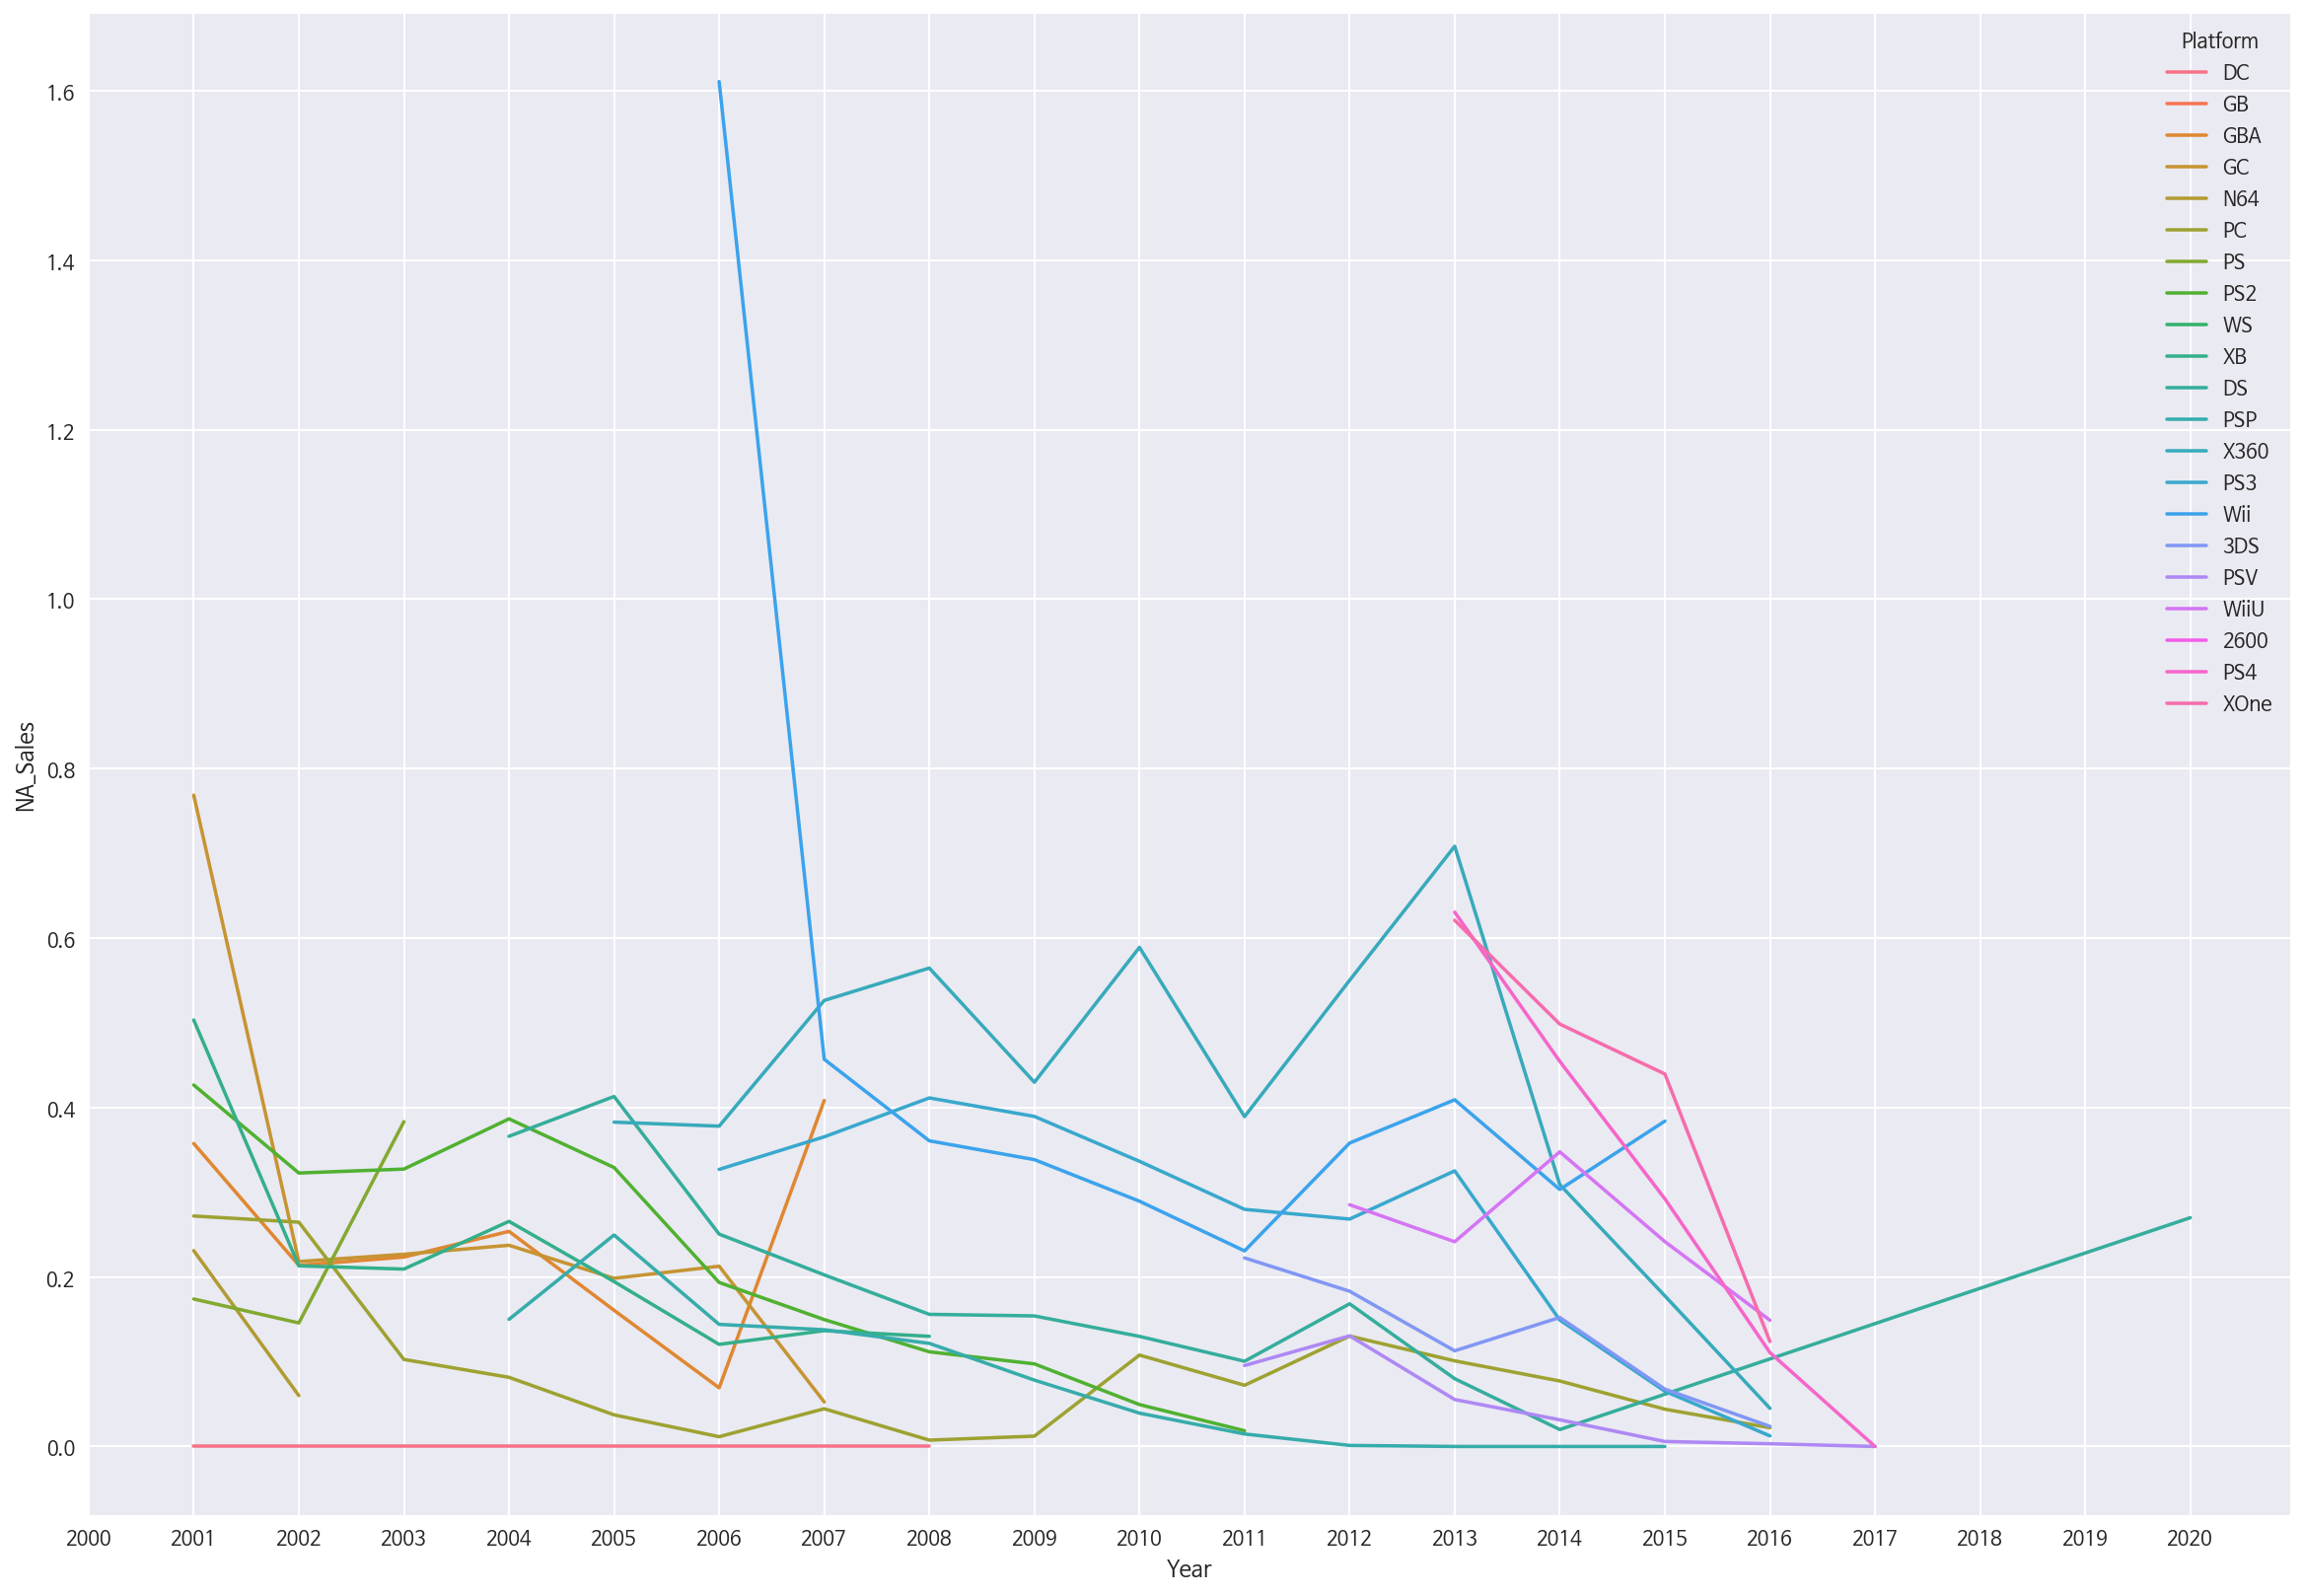

In [ ]:
plt.figure(figsize = [20,14])

sns.set_palette('rainbow')
sns.lineplot(x = NA_platform.Year, y = NA_platform.NA_Sales, hue = NA_platform.Platform)
plt.xticks(np.arange(2000, 2021))

plt.show()

* 크게 분류가능
 - Nintendo : DS, Wii, GBA, GC, 3DS, N64, SNES, SAT, WiiU, 2600, GB, NES
 - Xbox : XB, XOne
 - PS : PS2, PS3, PSP, PS, PSV, PS4
 - PC
 - Others: GEN,NG, SCD, WS, 3DO, TG16, GG(포터블), PCFX

* PS4, PS5와 같이 전 세대에서 바뀐 플랫폼들이 여럿 존재하므로 플랫폼을 위의 5개로 줄인다.

In [ ]:
df_nintendo = df_recent.query('Platform == "DS" | Platform == "Wii" | Platform == "GBA" | Platform == "GC" | Platform == "3DS" | Platform == "N64" | Platform == "SNES" | Platform == "SAT" | Platform == "WiiU" | Platform == "2600" | Platform == "GB" | Platform == "NES"')
df_xbox = df_recent.query('Platform == "XB" | Platform == "XOne"')
df_ps = df_recent.query('Platform == "PS2" | Platform == "PS3" | Platform == "PSP" | Platform == "PS" | Platform == "PS4" | Platform == "PSV"')
df_pc = df_recent.query('Platform == "PC"')
df_etc = df_recent.query('Platform == "GEN" | Platform == "NG" | Platform == "SCD" | Platform == "WS" | Platform == "3DO" | Platform == "TG16" | Platform == "GG" | Platform == "PCFX"')

In [ ]:
df_nintendo['Platform_kind'] = np.repeat("Nintendo", df_nintendo.shape[0])
df_xbox['Platform_kind'] = np.repeat("Xbox", df_xbox.shape[0])
df_ps['Platform_kind'] = np.repeat("PS", df_ps.shape[0])
df_pc['Platform_kind'] = np.repeat("PC", df_pc.shape[0])
df_etc['Platform_kind'] = np.repeat("Others", df_etc.shape[0])

In [ ]:
platform_kind = df_nintendo.append([df_xbox, df_ps, df_pc, df_etc], ignore_index = True)
platform_kind

Name Platform  Year  \
0                    Candace Kane's Candy Factory       DS  2008   
1                                  The Munchables      Wii  2009   
2                Deal or No Deal: Special Edition       DS  2010   
3                          Power Pro Kun Pocket 8       DS  2005   
4      Harvest Moon: More Friends of Mineral Town      GBA  2003   
...                                           ...      ...   ...   
12927                                    Gothic 3       PC  2006   
12928                         Richard Burns Rally       PC  2004   
12929                          Grand Theft Auto V       PC  2015   
12930                            Final Fantasy II       WS  2001   
12931       SD Gundam G Generation: Gather Beat 2       WS  2001   

              Genre                     Publisher  NA_Sales  EU_Sales  \
0            Action                     Destineer      0.04      0.00   
1            Action            Namco Bandai Games      0.17      0.00   
2              Misc                     Zoo Games      0.04      0.00   
3            Sports  Konami Digital Entertainment      0.00      0.00   
4        Simulation                       Ubisoft      0.14      0.05   
...             ...                           ...       ...       ...   
12927  Role-Playing            JoWood Productions      0.00      0.05   
12928        Racing                           SCi      0.00      0.03   
12929        Action          Take-Two Interactive      0.36      0.64   
12930  Role-Playing                    SquareSoft      0.00      0.00   
12931      Strategy            Namco Bandai Games      0.00      0.00   

       JP_Sales  Other_Sales  Sales_sum Platform_kind  
0          0.00         0.00       0.04      Nintendo  
1          0.00         0.01       0.18      Nintendo  
2          0.00         0.00       0.04      Nintendo  
3          0.14         0.00       0.14      Nintendo  
4          0.00         0.00       0.19      Nintendo  
...         ...          ...        ...           ...  
12927      0.00         0.01       0.06            PC  
12928      0.00         0.01       0.04            PC  
12929      0.00         0.08       1.08            PC  
12930      0.25         0.00       0.25        Others  
12931      0.03         0.00       0.03        Others  

[12932 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
NA_kind = platform_kind.groupby(['Platform_kind','Year'], as_index = False).NA_Sales.mean()

NA_pivot = pd.pivot_table(NA_kind,
               index = 'Year',
               columns = 'Platform_kind',
               values = 'NA_Sales'
               ).fillna(0)

NA_pivot.head()

Platform_kind  Nintendo  Others        PC        PS      Xbox
Year                                                         
2001           0.405270     0.0  0.272000  0.343055  0.503333
2002           0.215348     0.0  0.264737  0.312500  0.213185
2003           0.225154     0.0  0.102727  0.328038  0.209381
2004           0.258221     0.0  0.081613  0.373745  0.265690
2005           0.255817     0.0  0.037297  0.307753  0.194637

In [ ]:
EU_kind = platform_kind.groupby(['Platform_kind','Year'], as_index = False).EU_Sales.mean()

EU_pivot = pd.pivot_table(EU_kind,
               index = 'Year',
               columns = 'Platform_kind',
               values = 'EU_Sales'
               ).fillna(0)

EU_pivot.head()

Platform_kind  Nintendo  Others        PC        PS      Xbox
Year                                                         
2001           0.155676     0.0  0.082667  0.238582  0.140909
2002           0.076176     0.0  0.166842  0.212348  0.073631
2003           0.079761     0.0  0.149091  0.240154  0.070429
2004           0.097687     0.0  0.242581  0.219236  0.077931
2005           0.159026     0.0  0.072162  0.142584  0.069777

In [ ]:
JP_kind = platform_kind.groupby(['Platform_kind','Year'], as_index = False).JP_Sales.mean()

JP_pivot = pd.pivot_table(JP_kind,
               index = 'Year',
               columns = 'Platform_kind',
               values = 'JP_Sales'
               ).fillna(0)

JP_pivot.head()

Platform_kind  Nintendo  Others        PC        PS      Xbox
Year                                                         
2001           0.111419    0.14  0.000000  0.074764  0.011212
2002           0.049465    0.00  0.000000  0.076524  0.003121
2003           0.049761    0.00  0.000000  0.072615  0.001429
2004           0.071779    0.00  0.002581  0.077273  0.001149
2005           0.102292    0.00  0.000000  0.051011  0.000112

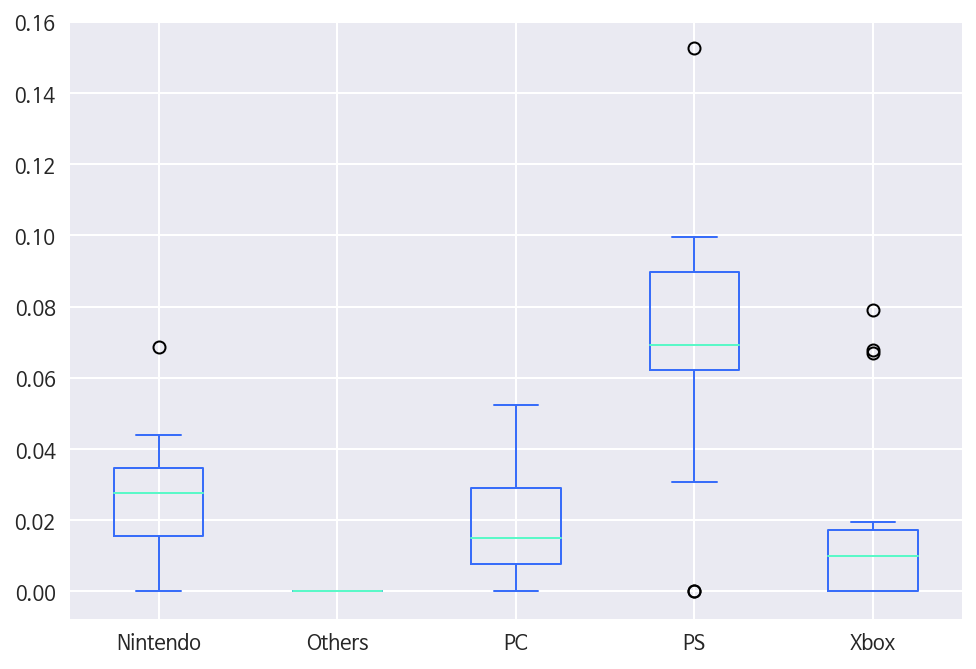

In [ ]:
other_kind = platform_kind.groupby(['Platform_kind','Year'], as_index = False).Other_Sales.mean()

other_pivot = pd.pivot_table(other_kind,
                             index = 'Year',
                             columns = 'Platform_kind',
                             values = 'Other_Sales').fillna(0)
other_pivot.plot(kind = "box")

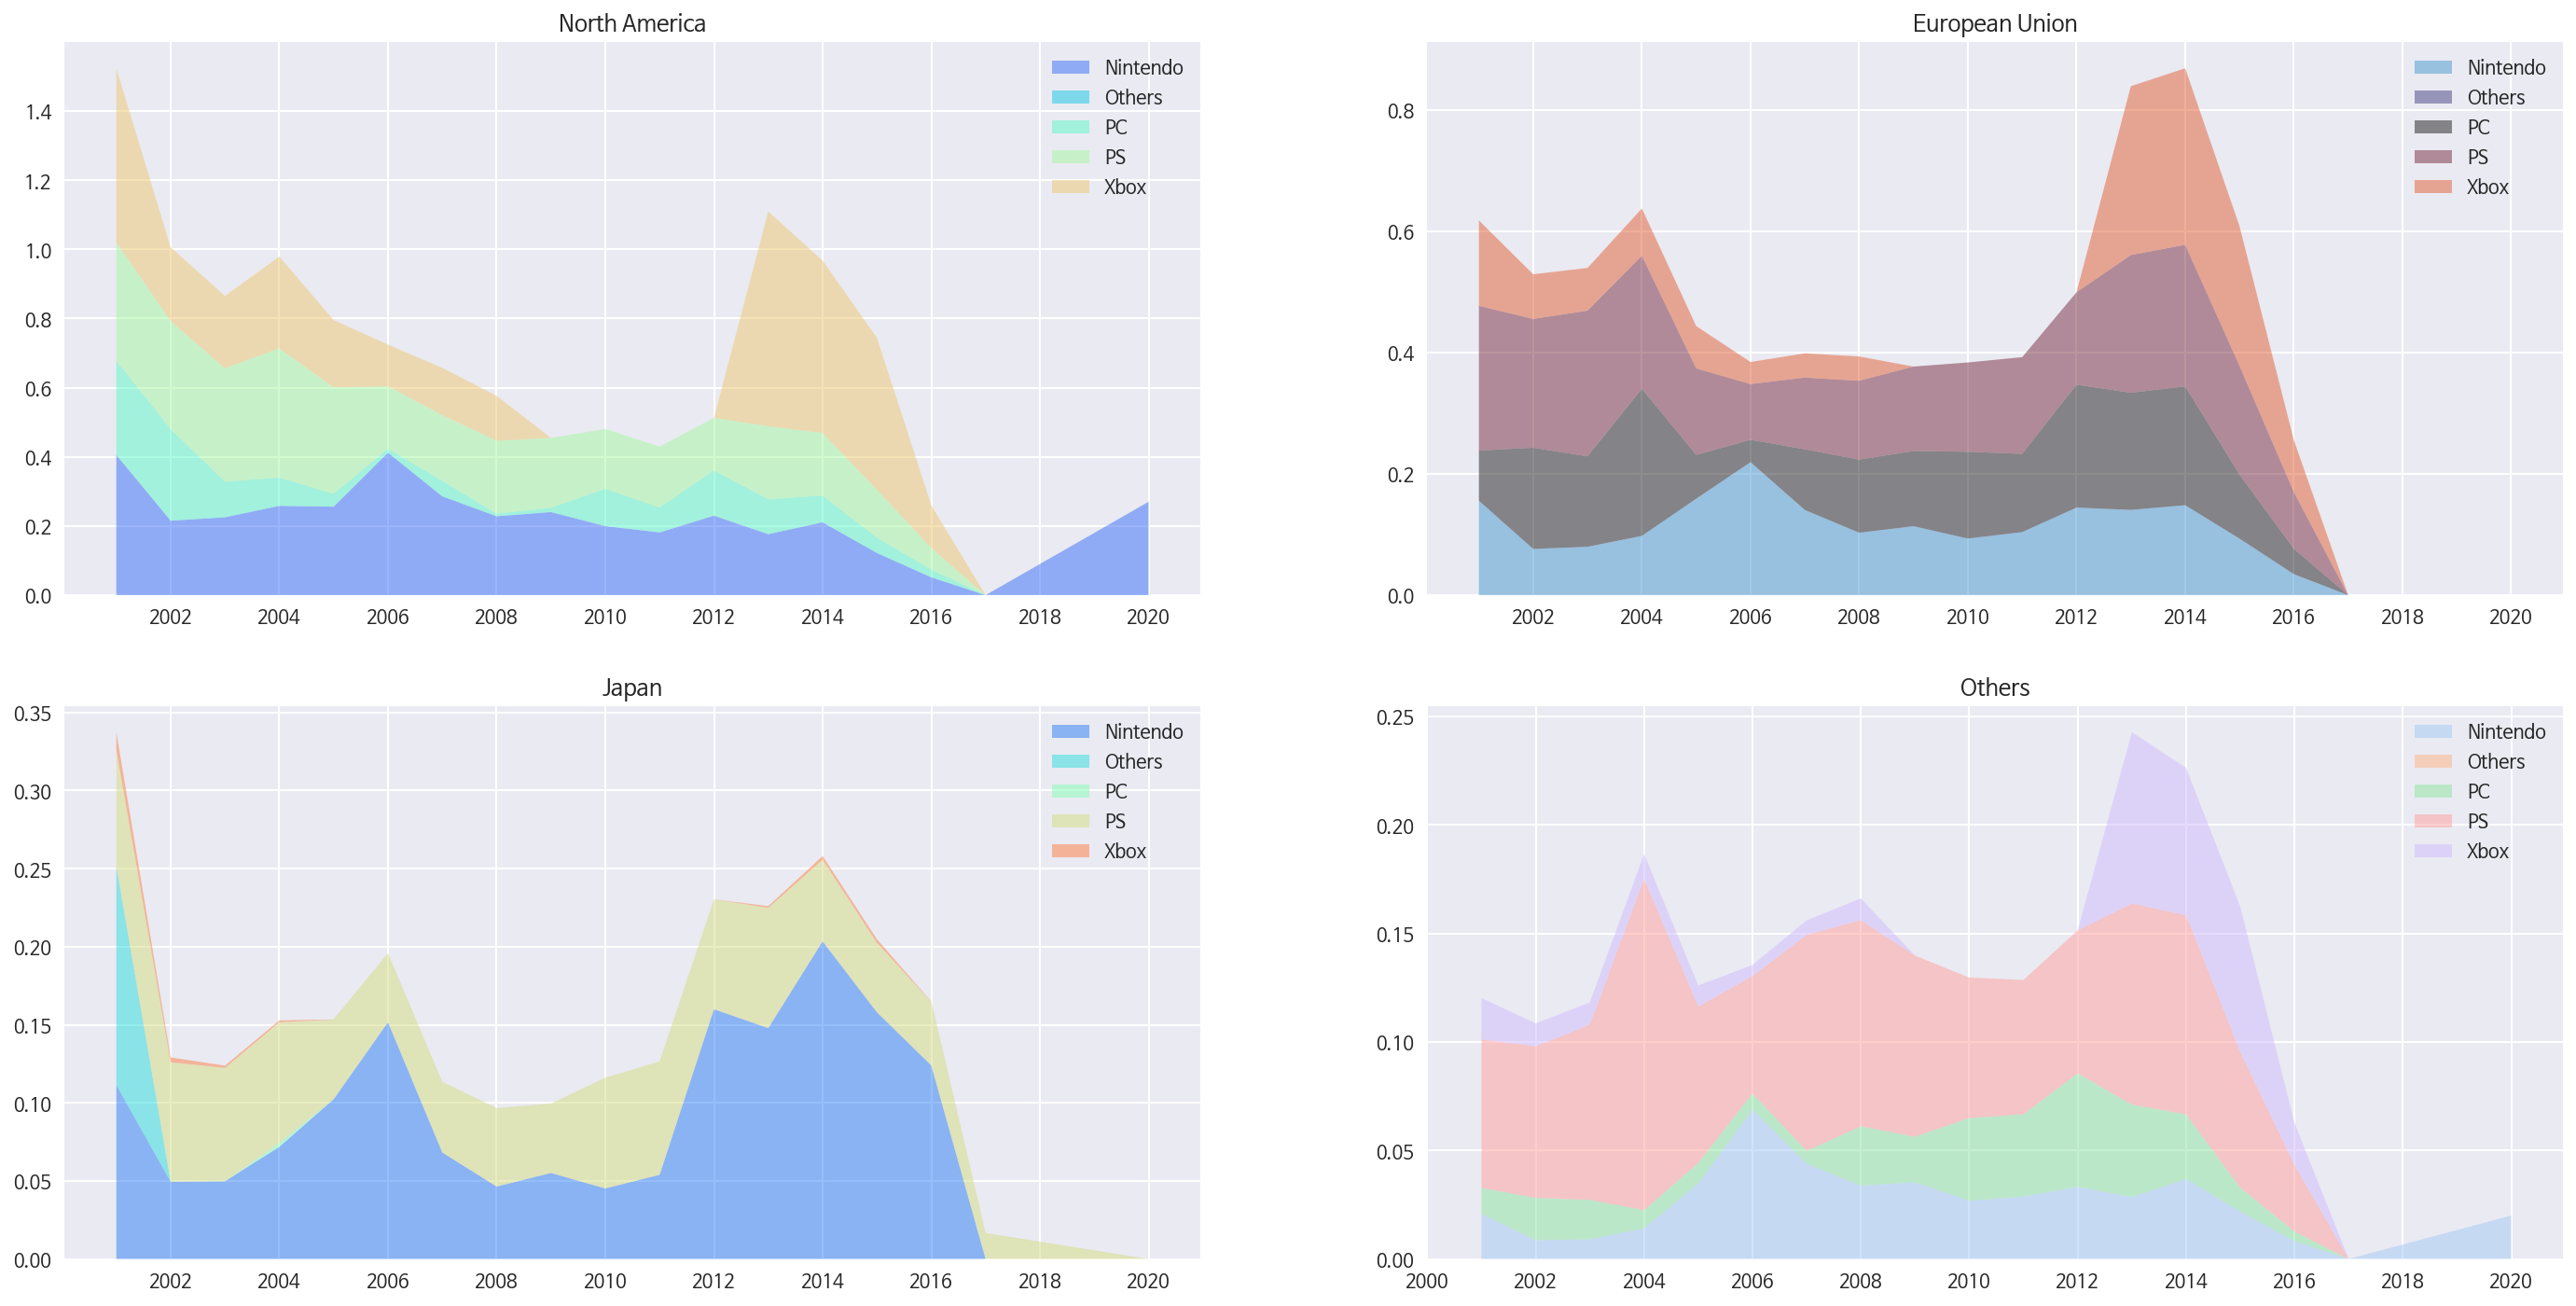

In [ ]:
plt.figure(figsize = (24,12))

ax1 = plt.subplot(2,2,1)
sns.set_palette('icefire',5)
plt.stackplot(NA_pivot.index,
              [NA_pivot['Nintendo'], NA_pivot['Others'], NA_pivot['PC'], NA_pivot['PS'], NA_pivot['Xbox']],
              labels=list(NA_pivot),
              alpha=0.5)
plt.xticks(np.arange(2000,2021,2))
plt.legend(loc = "best")
plt.title('North America')


ax2 = plt.subplot(2,2,2, sharex = ax1)
sns.set_palette('rainbow', 5)

plt.stackplot(EU_pivot.index,
              [EU_pivot.Nintendo, EU_pivot.Others, EU_pivot.PC, EU_pivot.PS, EU_pivot.Xbox],
              labels = list(EU_pivot),
              alpha = 0.5)
plt.xticks(np.arange(2000, 2021,2))
plt.legend(loc = "best")
plt.title('European Union')


ax3 = plt.subplot(2,2,3, sharex = ax1)
sns.set_palette('pastel', 5)

plt.stackplot(JP_pivot.index,
              [JP_pivot.Nintendo, JP_pivot.Others, JP_pivot.PC, JP_pivot.PS, JP_pivot.Xbox],
              labels = list(JP_pivot),
              alpha = 0.5)
plt.xticks(np.arange(2000, 2021,2))
plt.legend(loc = "best")
plt.title('Japan')


ax4 = plt.subplot(2,2,4, sharex = ax1)
sns.set_palette('Accent', 5)

plt.stackplot(other_pivot.index,
              [other_pivot.Nintendo, other_pivot.Others, other_pivot.PC, other_pivot.PS, other_pivot.Xbox],
              labels = list(other_pivot),
              alpha = 0.5)
plt.xticks(np.arange(2000, 2021,2))
plt.legend(loc = "best")
plt.title('Others')

plt.show()

- 각 나라별로 플랫폼에 따른 판매량을 확인해 봤을 때, 대체적으로 NIntendo 플랫폼이 가장 많이 팔리고 있는 추세임을 확인할 수 있다.

In [ ]:
Sum_kind = platform_kind.groupby(['Platform_kind','Year'], as_index = False).Sales_sum.mean()

Sum_pivot = pd.pivot_table(Sum_kind,
               index = 'Year',
               columns = 'Platform_kind',
               values = 'Sales_sum'
               ).fillna(0)

Sum_pivot.head()

Platform_kind  Nintendo  Others        PC        PS      Xbox
Year                                                         
2001           0.693108    0.14  0.366667  0.724800  0.674545
2002           0.349652    0.00  0.451053  0.671220  0.300510
2003           0.363720    0.00  0.270000  0.721538  0.291476
2004           0.441779    0.00  0.335161  0.822909  0.356207
2005           0.551948    0.00  0.118919  0.573427  0.274190

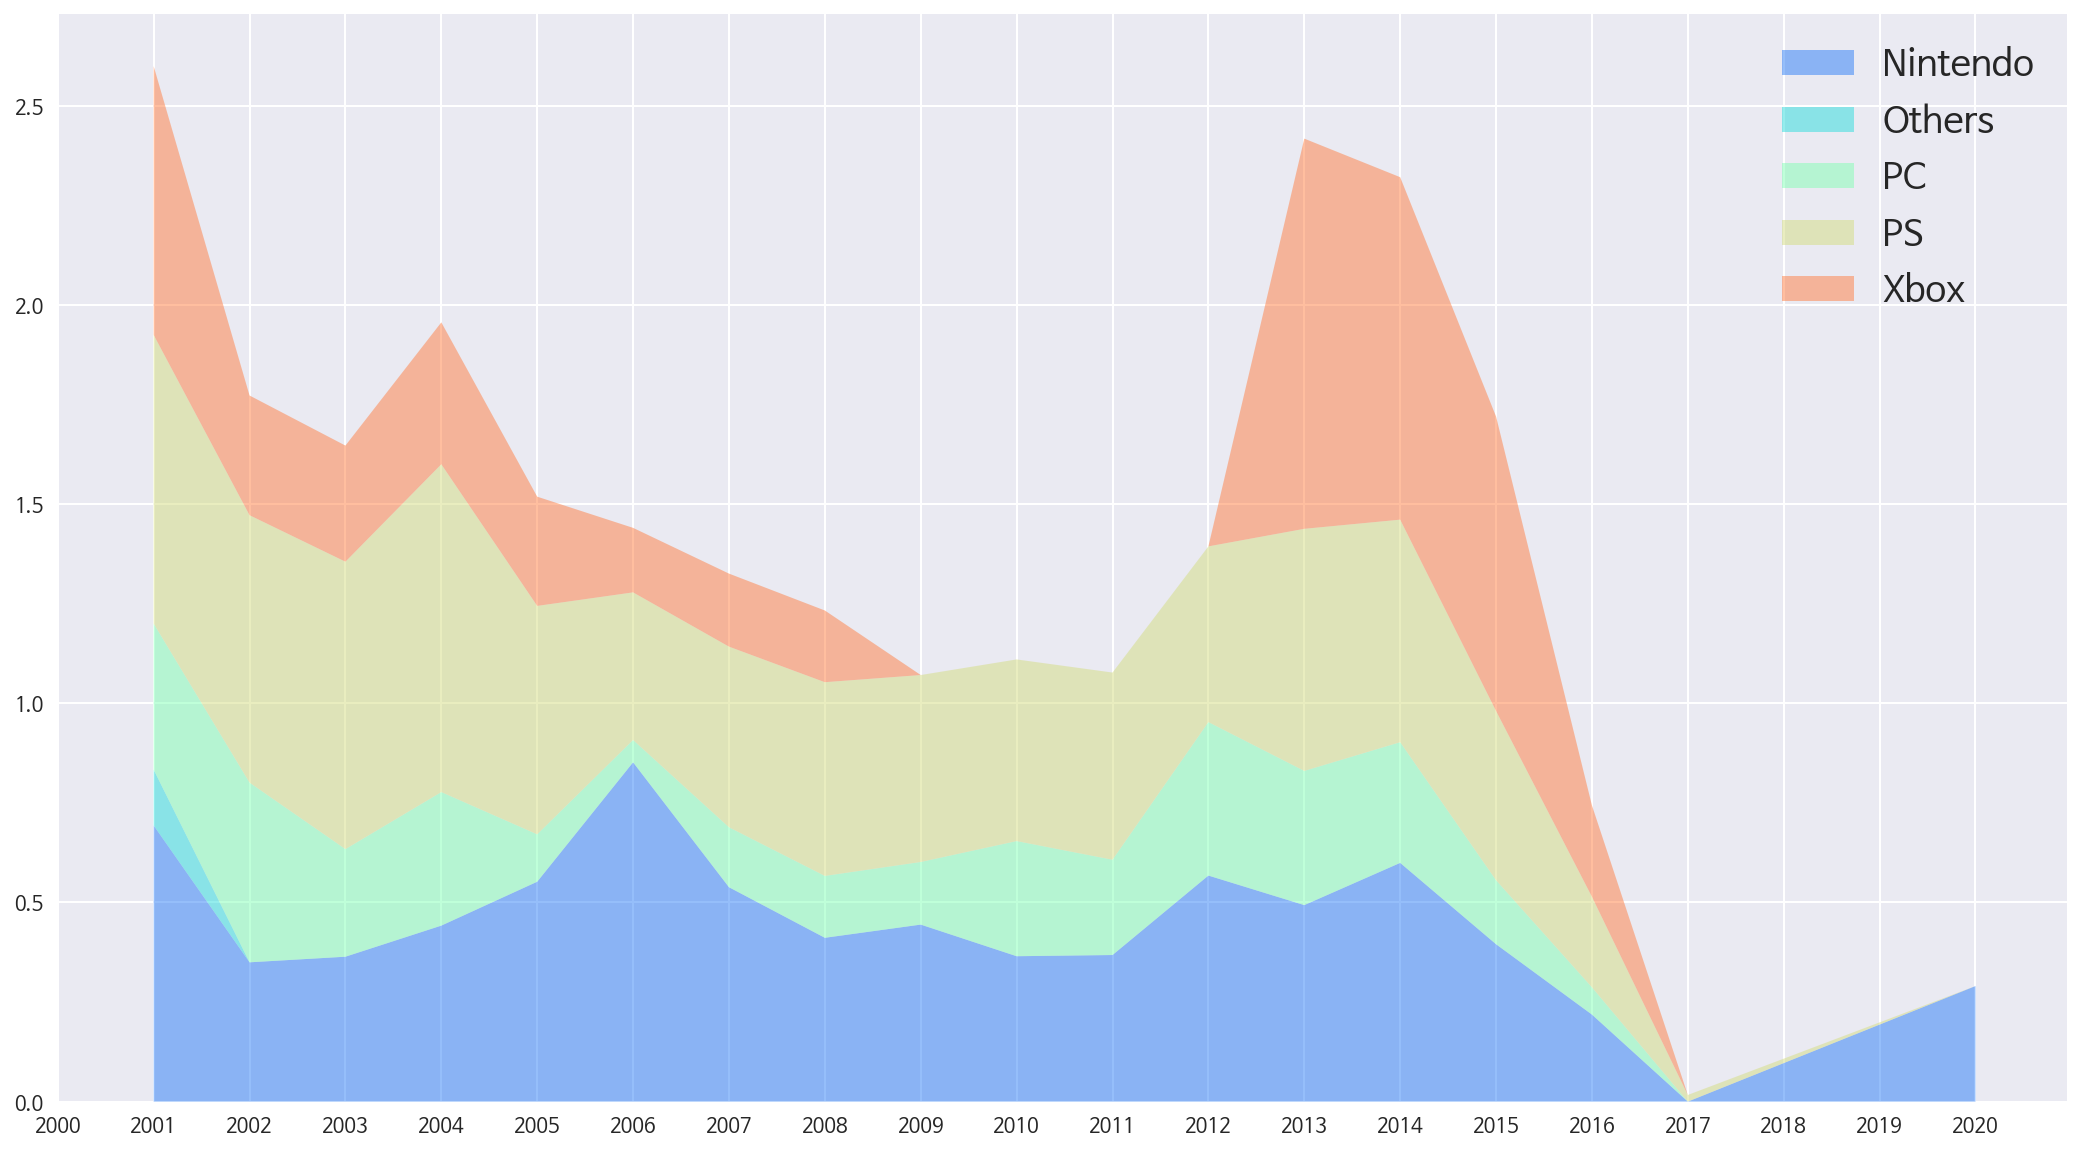

In [ ]:
plt.figure(figsize = (18,10))
sns.set_palette('rainbow',5)

plt.stackplot(Sum_pivot.index,
              [Sum_pivot['Nintendo'], Sum_pivot['Others'], Sum_pivot['PC'], Sum_pivot['PS'], Sum_pivot['Xbox']],
              labels=list(Sum_pivot),
              alpha=0.5)

plt.xticks(np.arange(2000,2021))
plt.legend(loc = "best", fontsize = 18)

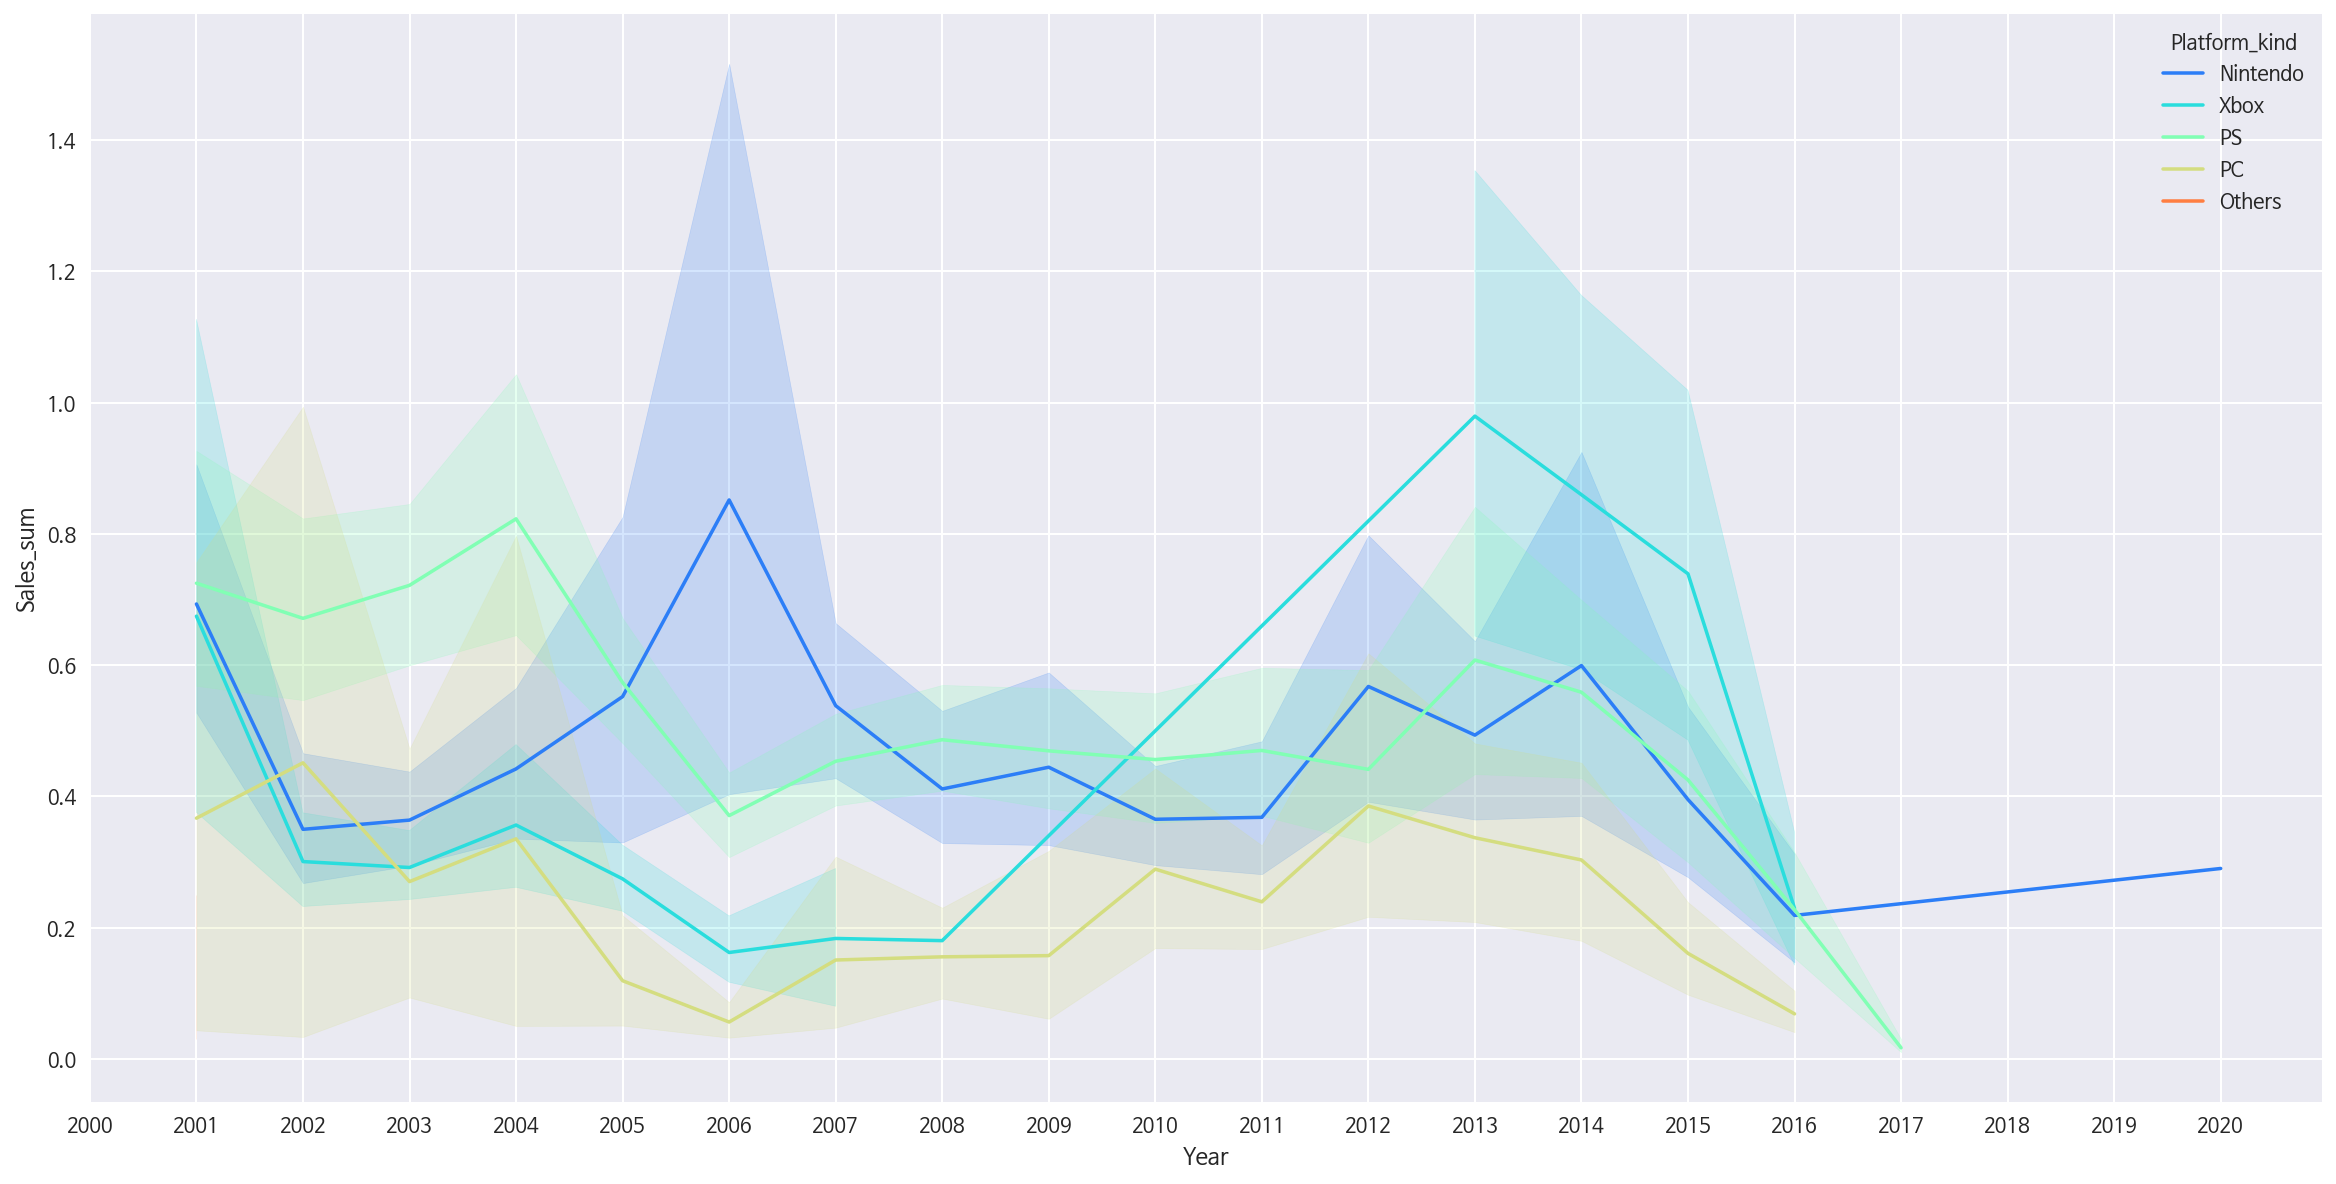

In [ ]:
plt.figure(figsize = (20,10))
sns.set_palette('rainbow', 5)

sns.lineplot(x = platform_kind.Year, y = platform_kind.Sales_sum, hue = platform_kind.Platform_kind )
plt.xticks(np.arange(2000, 2021))


plt.show()